# Clustering

In [1]:
# Load libraries
import sys
import scipy
import numpy
import pandas
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

import seaborn as sn
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# version check
print("Python: {}".format(sys.version))
print("scipy: {}".format(scipy.__version__))
print("numpy: {}".format(numpy.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("pandas: {}".format(pandas.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("\n")


# Load dataset from the UCI Machine Learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
dataset = pandas.read_csv(url)
dataset.info()


Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.20.3
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 0.24.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 n

# Data Visualization: Refer OnlineShopDataAnalysis file

# Label Encoding

In [2]:
def label_encoded_dataset():
    dataset_enc = pandas.read_csv(url)
    #print(str(dataset_enc.dtypes))
    #print(str(dataset_enc['Revenue'].unique()))
    #print(str(dataset_enc['Weekend'].unique()))
    #print(str(dataset_enc['Month'].unique()))
    #print(str(dataset_enc['VisitorType'].unique()))
    #print(str(dataset_enc.head()))
    label_bool_mapping = {False:0, True: 1}
    dataset_enc['Revenue'] = dataset_enc['Revenue'].map(label_bool_mapping, na_action=None)
    dataset_enc['Weekend'] = dataset_enc['Weekend'].map(label_bool_mapping, na_action=None)

    label_month_mapping = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Oct':10, 'Nov':11, 'Sep':9, 'Dec':12}
    dataset_enc['Month'] = dataset_enc['Month'].map(label_month_mapping, na_action=None)
                           
    label_visitor_mapping = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
    dataset_enc['VisitorType'] = dataset_enc['VisitorType'].map(label_visitor_mapping, na_action=None)
    print(str(dataset_enc['Revenue'].unique()))
    print(str(dataset_enc['Weekend'].unique()))
    print(str(dataset_enc['Month'].unique()))
    print(str(dataset_enc['VisitorType'].unique()))
    return dataset_enc

dataset_encoded = label_encoded_dataset()
print(str(dataset_encoded.info()))
print(str(dataset_encoded.head()))
print(str(dataset_encoded.tail()))


[0 1]
[0 1]
[ 2  3  5 10  6  7  8 11  9 12]
[0 1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                  

# Data scale using StandardScaler

In [3]:
X = dataset_encoded.values
std_scaler = StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

#print(str(X_scaled[0:5, :]))
dataset_scaled = pandas.DataFrame(data=X_scaled, columns=dataset_encoded.columns)
print("Scaled data frames")
print(str(dataset_scaled.head()))
print(str(dataset_scaled.tail()))
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset_scaled.describe()))


Scaled data frames
   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821 -1.665924         -1.233426   
1    -0.457683   1.171473   -0.

# Hierarchical Clustering 


(12330, 18)

dendrogram plot: 



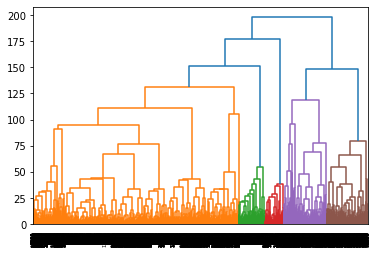

In [4]:

X = dataset_scaled.values
print(X.shape)
linked = linkage(X, method='ward', metric='euclidean')
print("\ndendrogram plot: \n")
dendrogram(linked,
            orientation='top',
            distance_sort='descending')
plt.show()
    
#for k in range(2,8):
#    clustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
#    clustering.fit_predict(X)
    #print("clusters ", clustering.n_clusters_)
    #print("childerns ",clustering.children_.shape)
    #print("Distance ",clustering.distances_)
    #print("distance ",clustering.labels_)
    
    #print("\nPredicated cluster plot: \n")
    #plt.scatter(data[:,0], data[:,1], c=clustering.labels_, cmap='rainbow')
    #plt.show()


#  Clusters Visualization 

In [5]:
def data_cluster_data_visualization(data):
    cluter_labels = data['labels'].unique()
    for label in cluter_labels:
        cluster = data[data['labels'] == label]
        
        #Drop Label
        #print("cluster shape", cluster.shape)
        cluster=cluster.drop(columns=['labels'])
        print("cluster shape", cluster.shape)
        
        columns = cluster.columns
        #Reverse transform
        cluster = std_scaler.inverse_transform(cluster)
        cluster_df = pandas.DataFrame(data=cluster, columns=columns)
        print("label: ", label)
        print("Revenues: \n"+str(cluster_df['Revenue'].value_counts()))
        
        # For a statistical summary: describe
        # This provides information such as mean, count, avg, max, min etc.
        #print(str(cluster_df.describe()))
        
        # To visualise univariate(plots of individual variables) plots: box and whisker plots
        # For better idea of variable distribution
        #print("\n plot: \n")
        #cluster_df.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
        #plt.show()
        

        #Correlation matrix
        corrMatrix = cluster_df.corr()
        #mask = numpy.zeros_like(corrMatrix)
        #mask[numpy.triu_indices_from(mask)] = True
        #print (corrMatrix)
        #plt.figure(figsize=(15, 15))
        #sn.heatmap(corrMatrix, annot=True, mask=mask)
        #plt.show()
        print("Revenues correlation values: \n"+str(corrMatrix["Revenue"].sort_values(ascending=False)))

        # To visualise as a histogram: hist
        print("\n hist: \n")
        cluster_df.hist(bins=50, figsize=(20,20))
        plt.show()

def agglo(n_clusters):
    clustering = AgglomerativeClustering(n_clusters = n_clusters, affinity='euclidean', linkage='ward', compute_distances = True)
    dataset_scaled['labels'] = clustering.fit_predict(X)
    print("labels: ", clustering.n_clusters_)
    #print("n_clusters_: ",clustering.n_clusters_)
    #print("n_leaves_: ", clustering.n_leaves_)
    #print("n_connected_components_: ",clustering.n_connected_components_)
    #print("n_features_in_: ", clustering.n_features_in_)
    #print("children_: ",clustering.children_.shape, clustering.children_)
    #print("distances_: ",clustering.distances_.shape, clustering.distances_)
    #print("X shape", X.shape)
    data_cluster_data_visualization(dataset_scaled)



#  2 Clusters 

labels:  2
cluster shape (9238, 18)
label:  0
Revenues: 
0.0    9108
1.0     130
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.414637
Browser                    0.242573
SpecialDay                 0.109735
Informational_Duration     0.084301
OperatingSystems           0.074022
VisitorType                0.067014
TrafficType                0.063634
ProductRelated             0.061441
ProductRelated_Duration    0.059581
Administrative             0.050976
Informational              0.050953
Administrative_Duration    0.043002
Region                     0.030217
Month                      0.017468
Weekend                   -0.000124
BounceRates               -0.037732
ExitRates                 -0.056772
Name: Revenue, dtype: float64

 hist: 



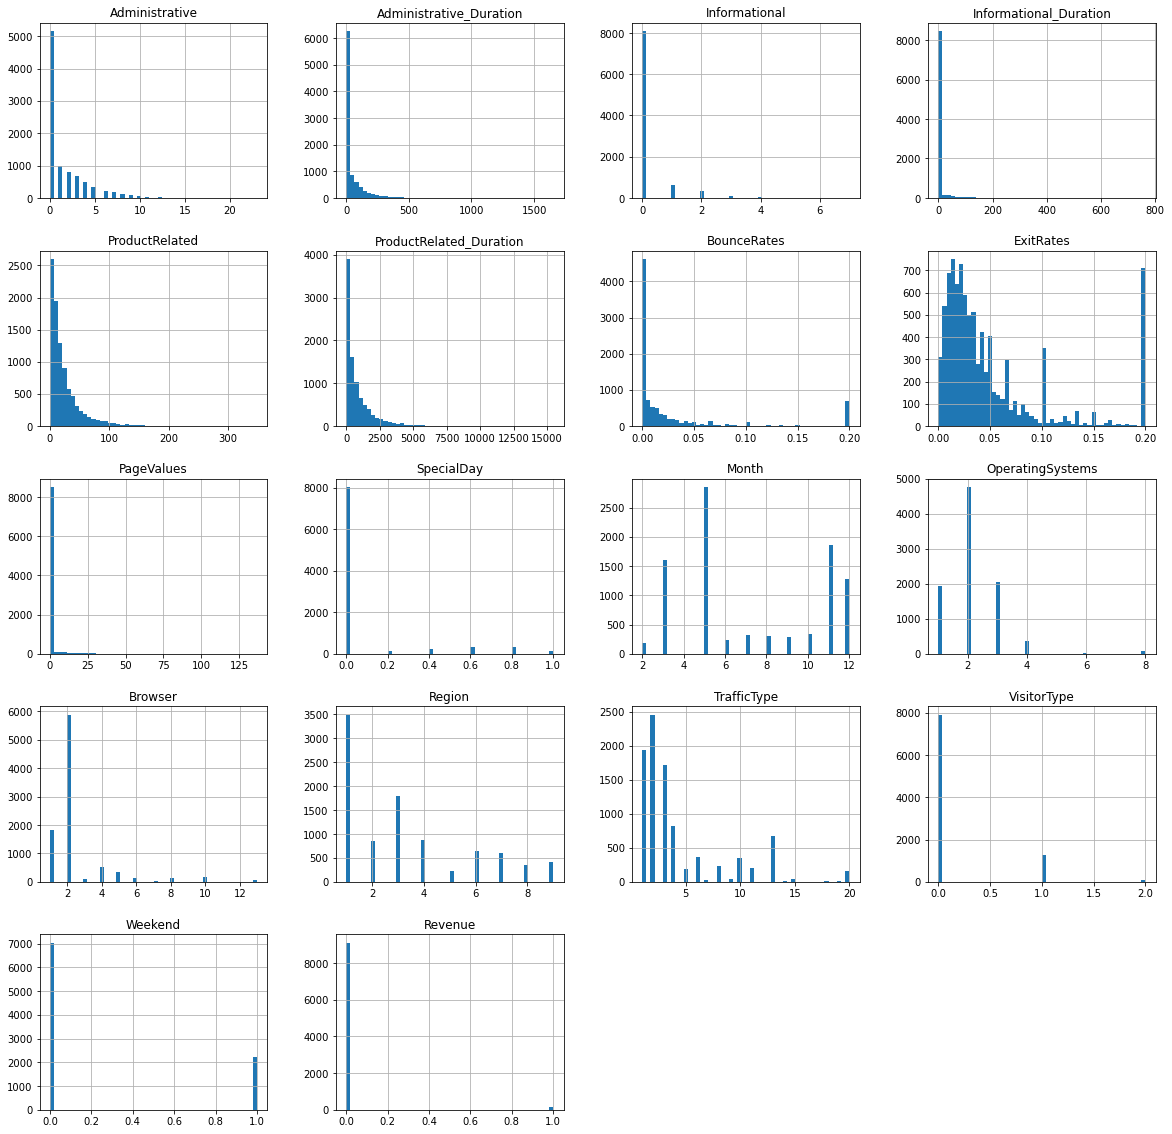

cluster shape (3092, 18)
label:  1
Revenues: 
1.0    1778
0.0    1314
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.298760
VisitorType                0.278212
TrafficType                0.157417
Weekend                    0.140278
Region                     0.060749
Browser                    0.041454
OperatingSystems           0.009125
Month                     -0.031726
SpecialDay                -0.052393
ExitRates                 -0.127845
BounceRates               -0.149849
ProductRelated_Duration   -0.149908
ProductRelated            -0.151364
Informational_Duration    -0.247072
Administrative_Duration   -0.253203
Administrative            -0.292348
Informational             -0.331008
Name: Revenue, dtype: float64

 hist: 



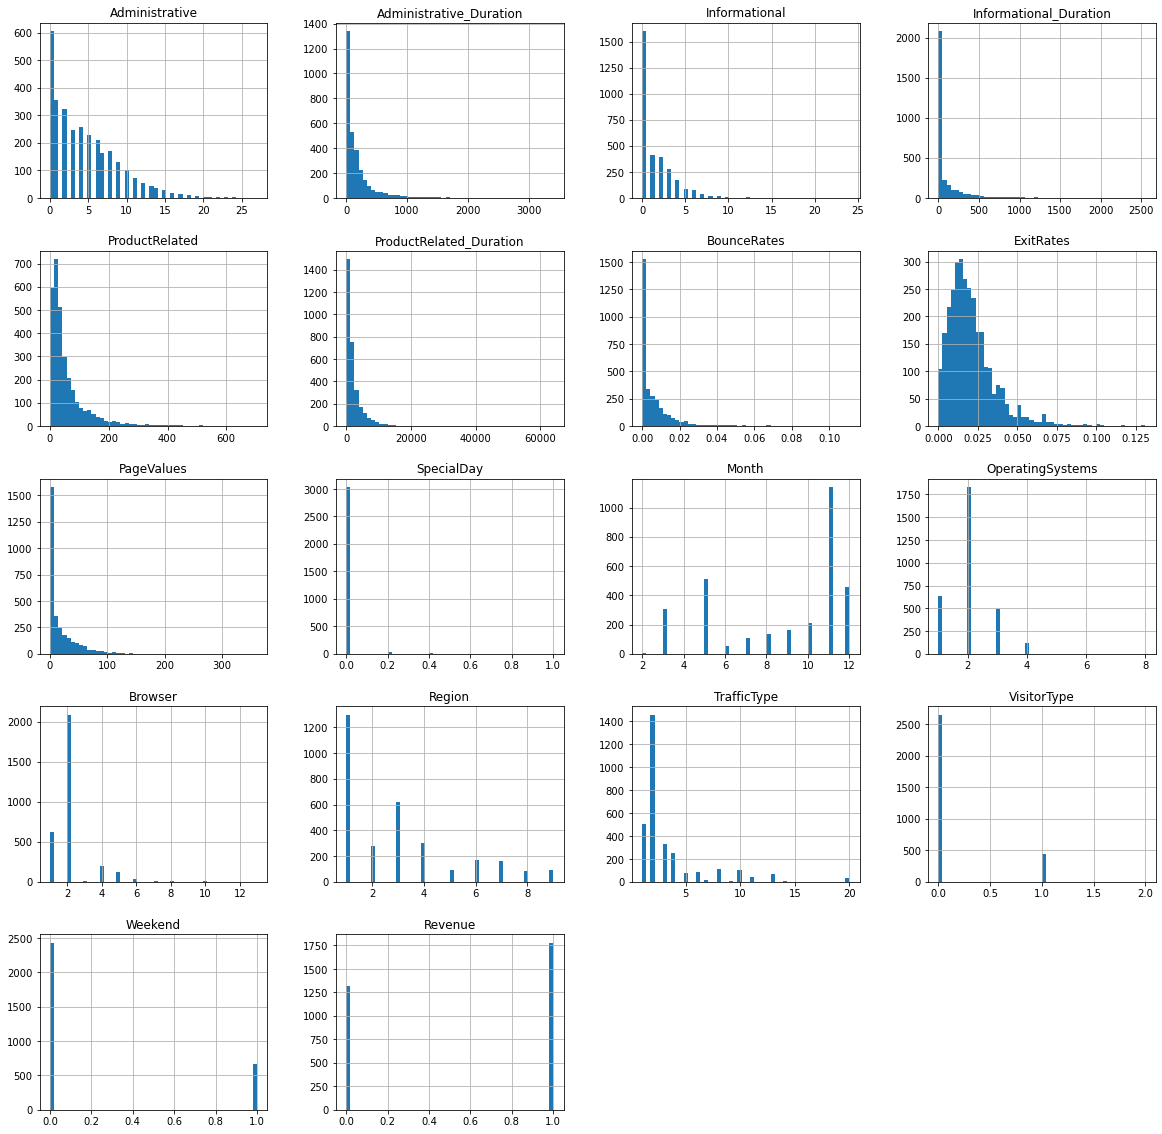

In [6]:
agglo(2)

#  2 Clusters Conclusions: 

Low revenue cluster label 0  and High revenue cluster label 1 


Cluster label 1 has highest revenue instances (1778 revenue / 1314 non revenue). 
 This culster contains 93.18% (1778/1908) revenue instances.
 
Cluster label 0 has highest no revenue instance (9108 non revenue / 130 revenue).
 This culster contains 87.39% (9108/10422) non revenues instaces.


# 3 Clusters

labels:  3
cluster shape (693, 18)
label:  2
Revenues: 
0.0    690
1.0      3
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
TrafficType                0.124312
Administrative             0.107327
Month                      0.064608
OperatingSystems           0.051434
Browser                    0.035325
BounceRates                0.019932
ExitRates                  0.019280
Administrative_Duration   -0.002507
ProductRelated            -0.003603
Informational             -0.005621
ProductRelated_Duration   -0.011214
SpecialDay                -0.011526
VisitorType               -0.014323
Weekend                   -0.037593
Region                    -0.040989
Informational_Duration          NaN
PageValues                      NaN
Name: Revenue, dtype: float64

 hist: 



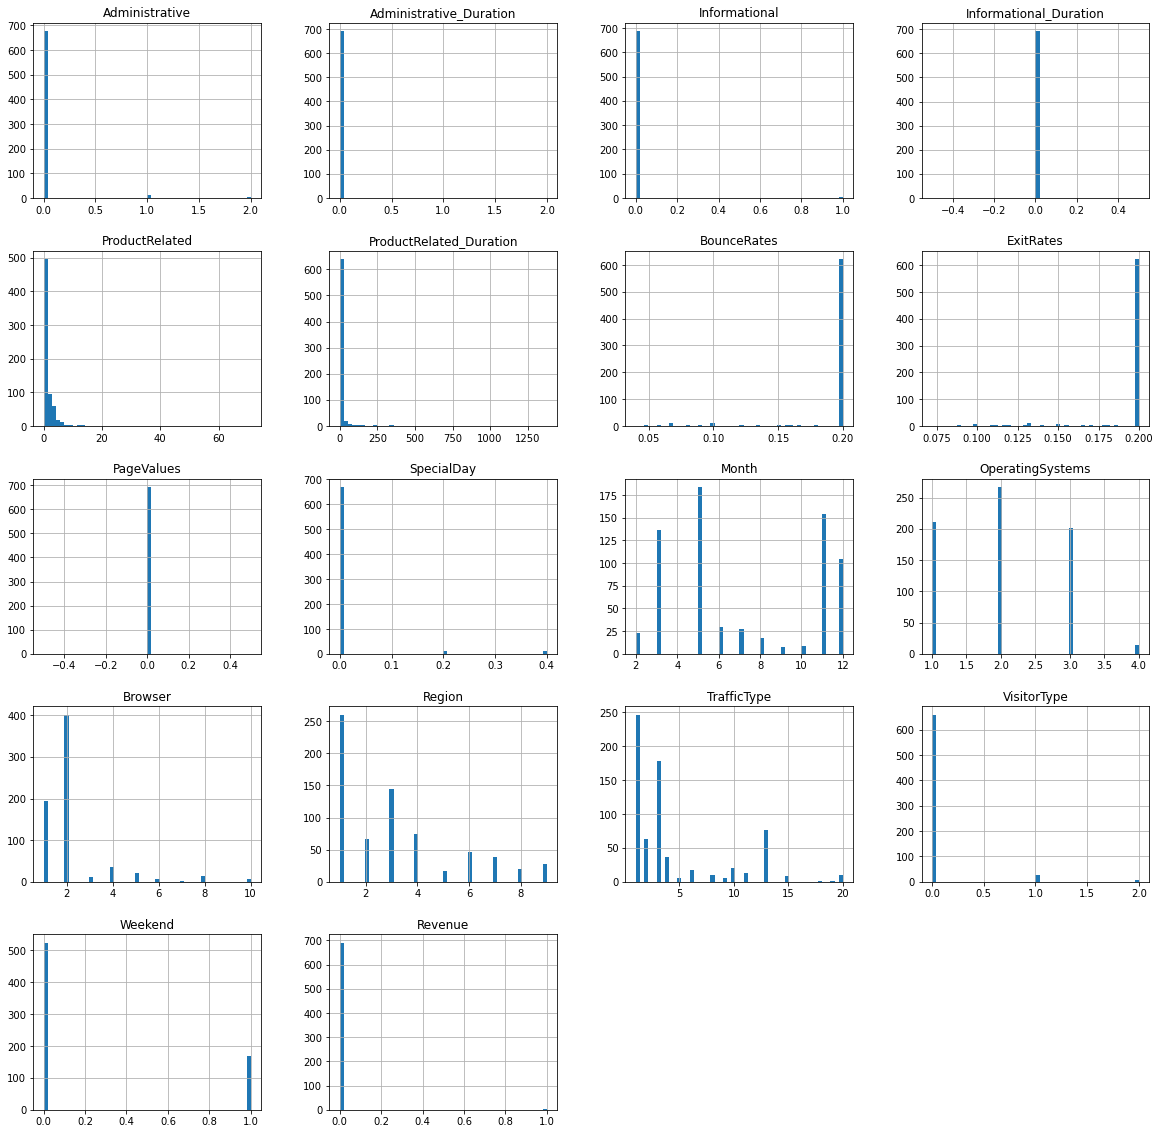

cluster shape (8545, 18)
label:  0
Revenues: 
0.0    8418
1.0     127
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.419000
Browser                    0.249877
SpecialDay                 0.109741
Informational_Duration     0.083980
OperatingSystems           0.074290
VisitorType                0.068352
TrafficType                0.061597
ProductRelated             0.058406
ProductRelated_Duration    0.056609
Informational              0.049728
Administrative             0.047829
Administrative_Duration    0.040530
Region                     0.033057
Month                      0.015333
Weekend                    0.001646
BounceRates               -0.036474
ExitRates                 -0.062169
Name: Revenue, dtype: float64

 hist: 



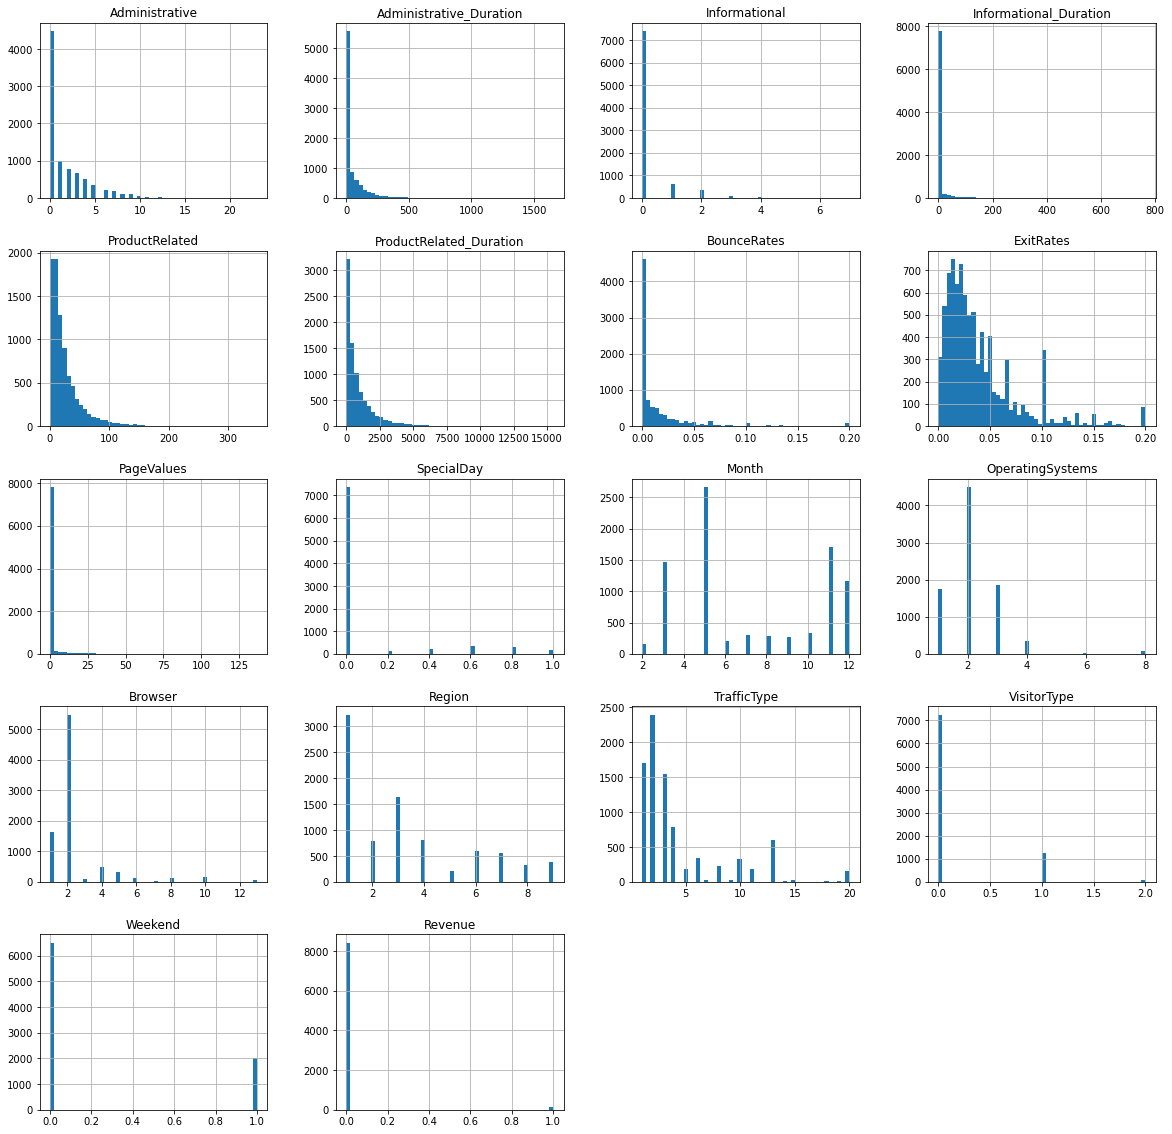

cluster shape (3092, 18)
label:  1
Revenues: 
1.0    1778
0.0    1314
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.298760
VisitorType                0.278212
TrafficType                0.157417
Weekend                    0.140278
Region                     0.060749
Browser                    0.041454
OperatingSystems           0.009125
Month                     -0.031726
SpecialDay                -0.052393
ExitRates                 -0.127845
BounceRates               -0.149849
ProductRelated_Duration   -0.149908
ProductRelated            -0.151364
Informational_Duration    -0.247072
Administrative_Duration   -0.253203
Administrative            -0.292348
Informational             -0.331008
Name: Revenue, dtype: float64

 hist: 



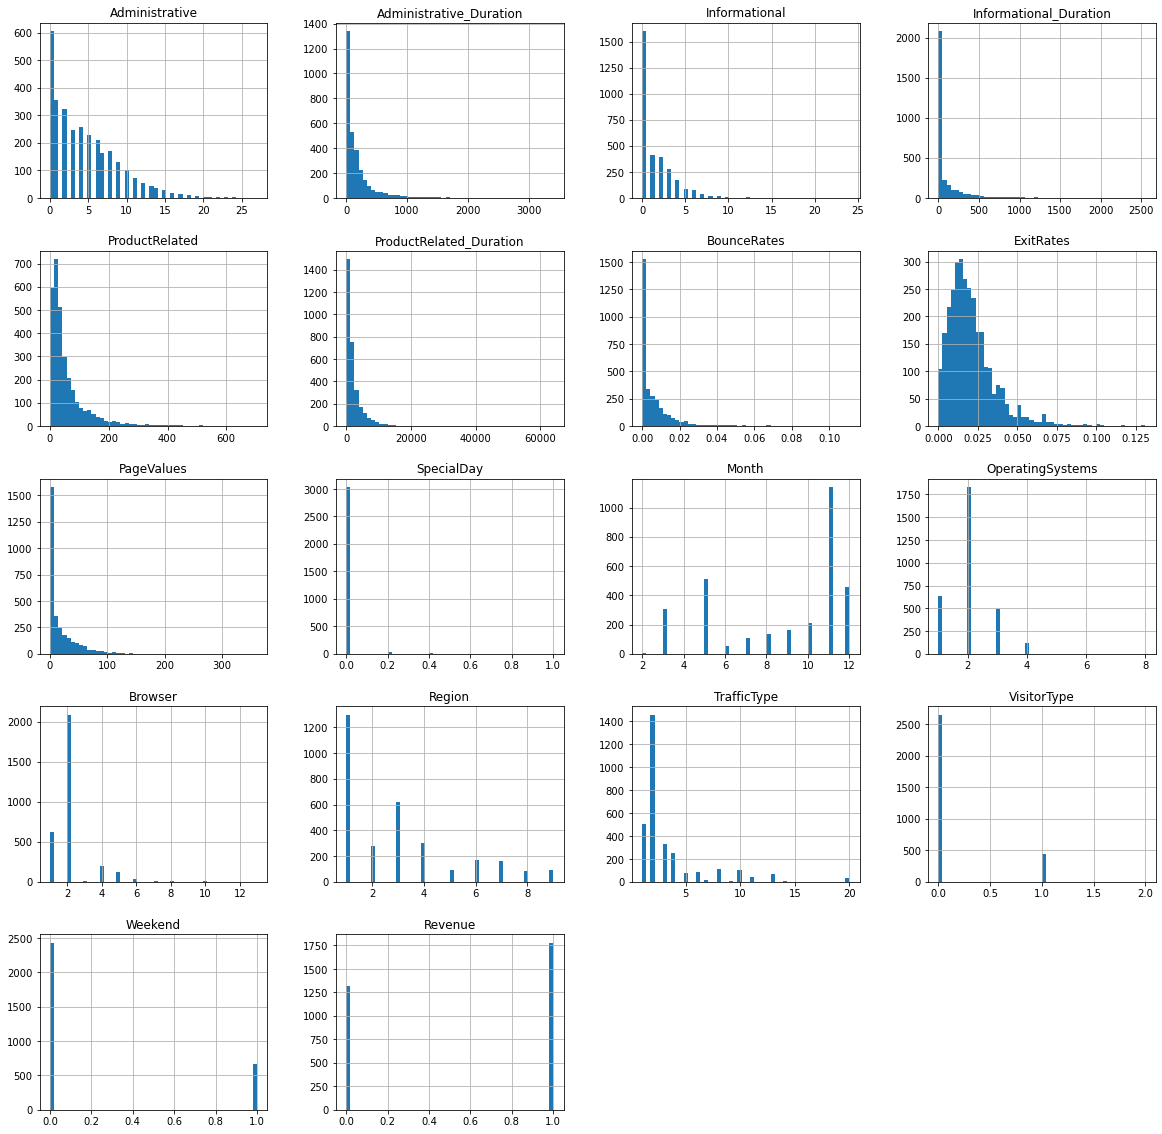

In [7]:
agglo(3)

# 3 Clusters Observation

Cluster label 1 has highest revenue instances (1778 revenue / 1314 non revenue). 
 This culster contains 93.18% (1778/1908) revenue instances.
 
Cluster label 0 has highest no revenue instance (8418 non revenue / 127 revenue).
 This culster contains 80.77% (8418/10422) non revenues instaces.



#   5 Clusters

labels:  5
cluster shape (693, 18)
label:  2
Revenues: 
0.0    690
1.0      3
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
TrafficType                0.124312
Administrative             0.107327
Month                      0.064608
OperatingSystems           0.051434
Browser                    0.035325
BounceRates                0.019932
ExitRates                  0.019280
Administrative_Duration   -0.002507
ProductRelated            -0.003603
Informational             -0.005621
ProductRelated_Duration   -0.011214
SpecialDay                -0.011526
VisitorType               -0.014323
Weekend                   -0.037593
Region                    -0.040989
Informational_Duration          NaN
PageValues                      NaN
Name: Revenue, dtype: float64

 hist: 



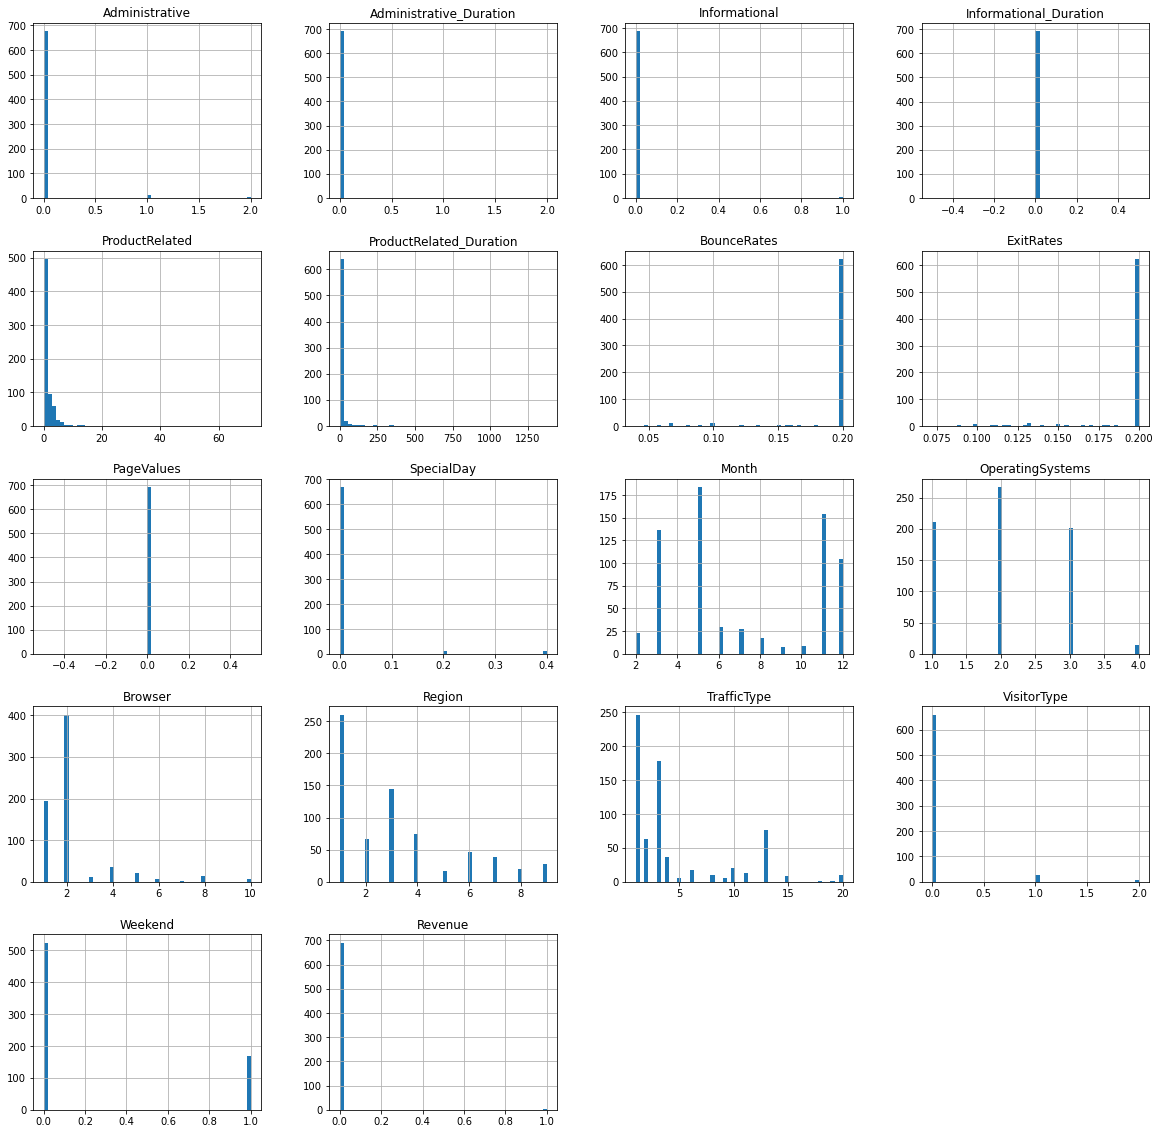

cluster shape (7580, 18)
label:  0
Revenues: 
0.0    7507
1.0      73
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.366346
Browser                    0.343279
TrafficType                0.102314
OperatingSystems           0.099445
Informational_Duration     0.095673
VisitorType                0.084060
Month                      0.062110
ProductRelated             0.061626
ProductRelated_Duration    0.061431
Administrative             0.059026
Administrative_Duration    0.051954
Informational              0.042333
Region                     0.040742
Weekend                    0.009022
SpecialDay                -0.004795
BounceRates               -0.026613
ExitRates                 -0.047190
Name: Revenue, dtype: float64

 hist: 



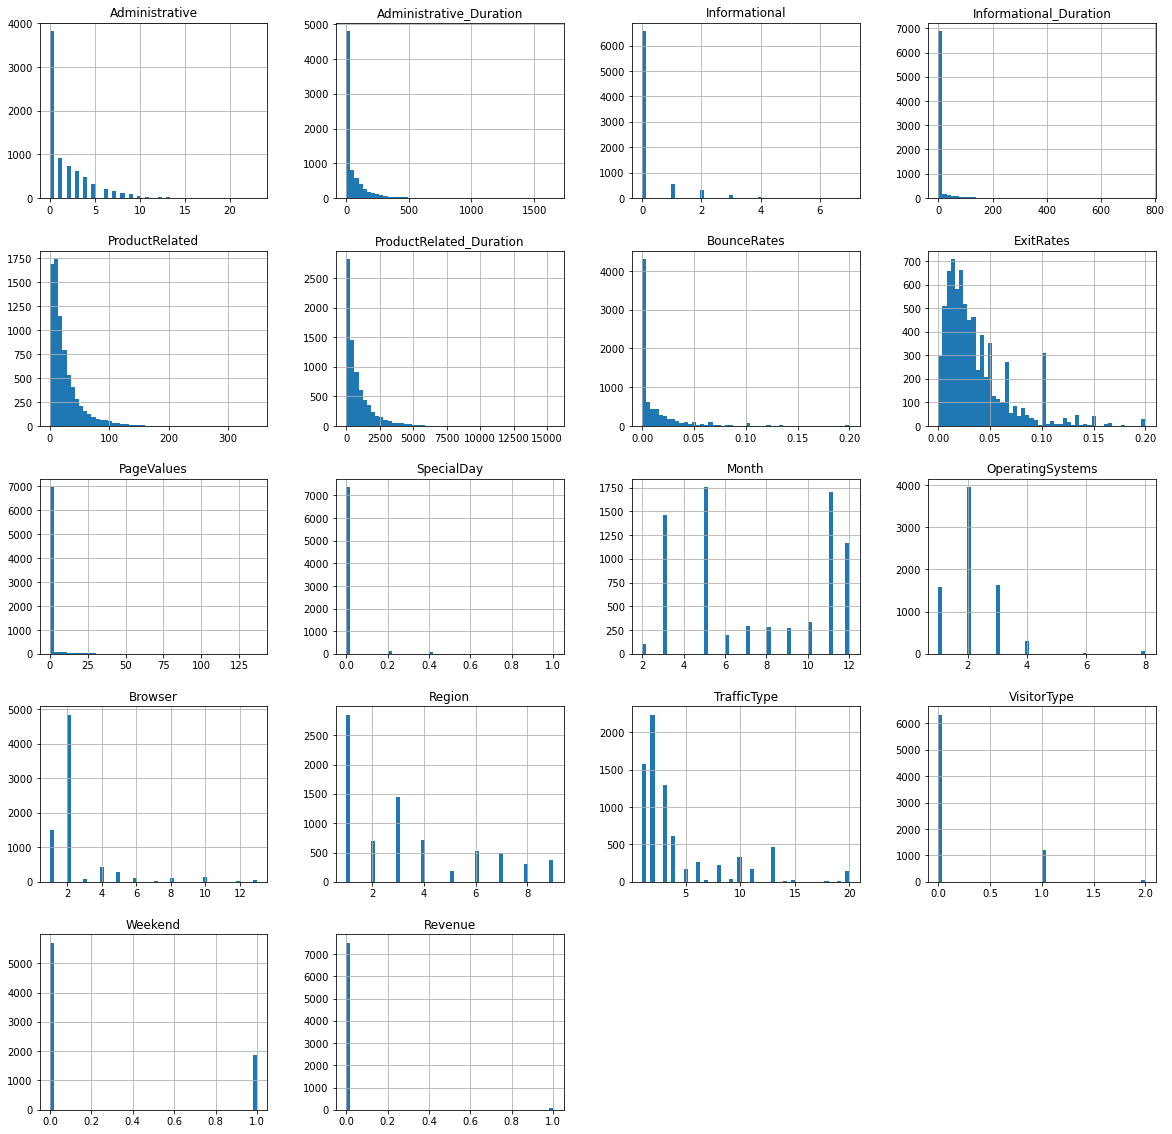

cluster shape (965, 18)
label:  3
Revenues: 
0.0    911
1.0     54
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.722640
VisitorType                0.159986
Informational              0.080166
Administrative             0.071409
Informational_Duration     0.059145
ProductRelated_Duration    0.046726
Administrative_Duration    0.045700
ProductRelated             0.044483
Region                     0.029390
Month                      0.020043
Weekend                    0.015560
OperatingSystems           0.006767
Browser                    0.001489
SpecialDay                -0.016379
TrafficType               -0.080744
BounceRates               -0.131842
ExitRates                 -0.185222
Name: Revenue, dtype: float64

 hist: 



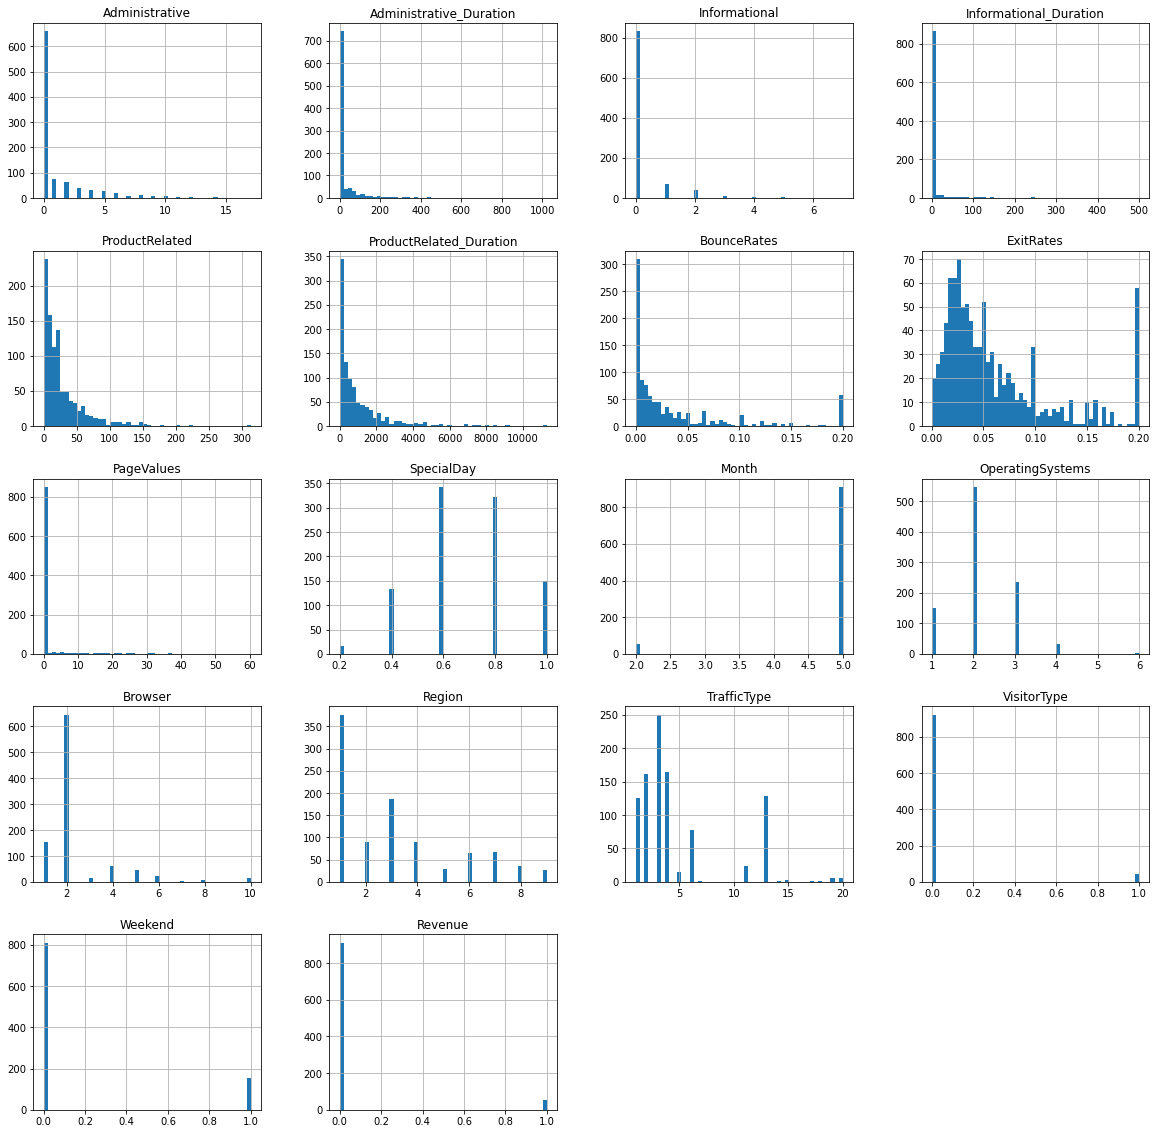

cluster shape (1570, 18)
label:  1
Revenues: 
0.0    1306
1.0     264
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
Administrative             0.207556
ProductRelated             0.172097
Weekend                    0.155160
ProductRelated_Duration    0.146924
Administrative_Duration    0.144468
PageValues                 0.125643
TrafficType                0.091734
VisitorType                0.074819
Month                      0.071310
OperatingSystems           0.035081
Browser                    0.017896
Informational_Duration     0.009249
Region                     0.008717
SpecialDay                -0.024718
Informational             -0.040840
BounceRates               -0.121740
ExitRates                 -0.141781
Name: Revenue, dtype: float64

 hist: 



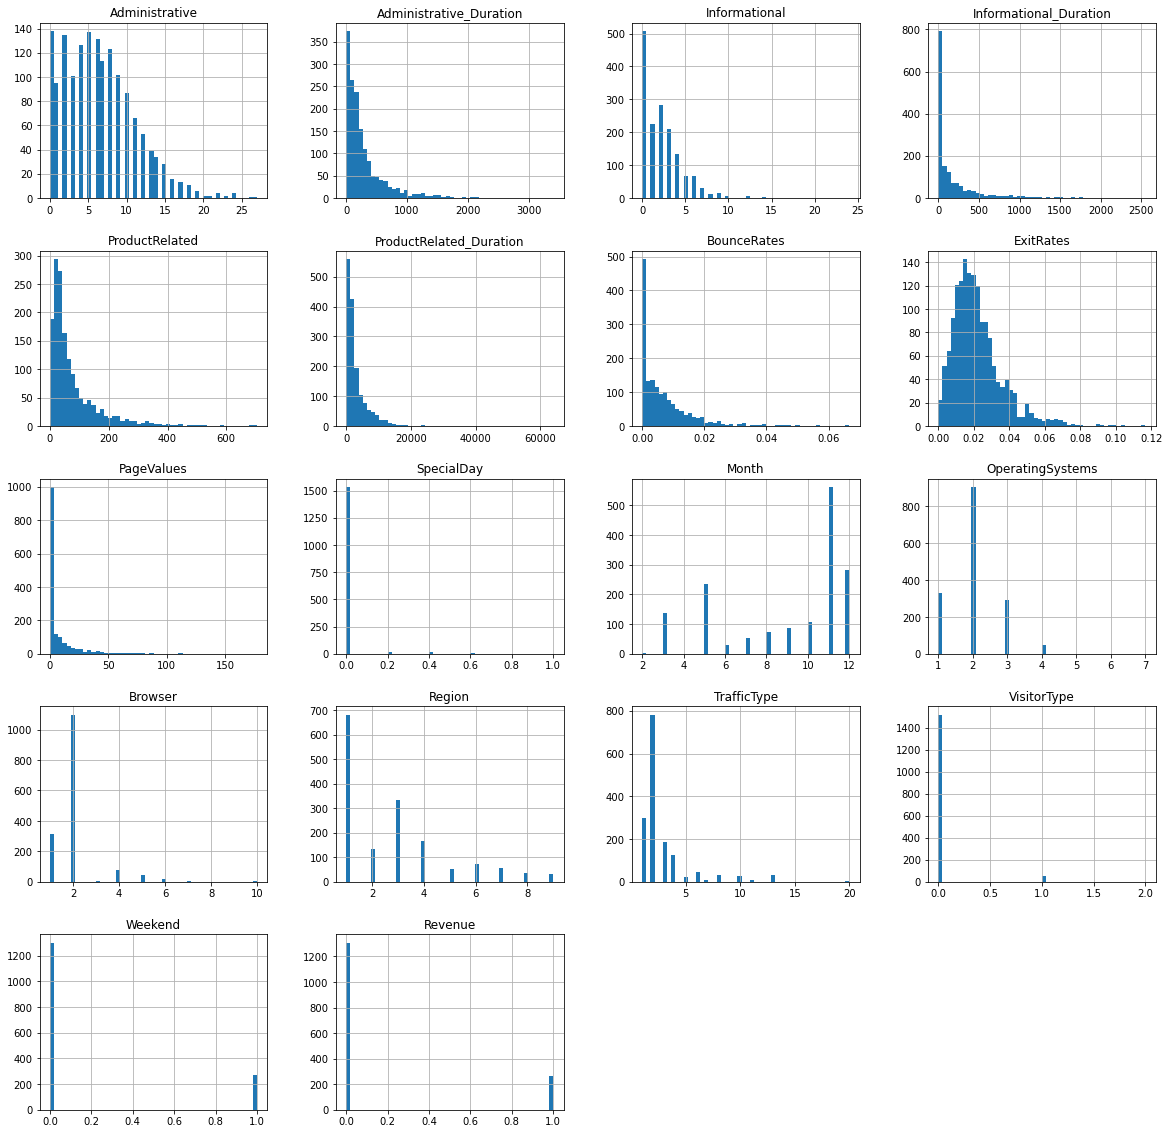

cluster shape (1522, 18)
label:  4
Revenues: 
1.0    1514
0.0       8
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
Informational_Duration     0.020401
Informational              0.013959
SpecialDay                 0.007416
ExitRates                  0.006091
Region                     0.005830
VisitorType                0.001136
Weekend                    0.001039
Administrative            -0.008438
OperatingSystems          -0.020314
BounceRates               -0.022337
Month                     -0.026752
Administrative_Duration   -0.031326
Browser                   -0.041042
ProductRelated_Duration   -0.045740
ProductRelated            -0.061907
TrafficType               -0.073517
PageValues                -0.213204
Name: Revenue, dtype: float64

 hist: 



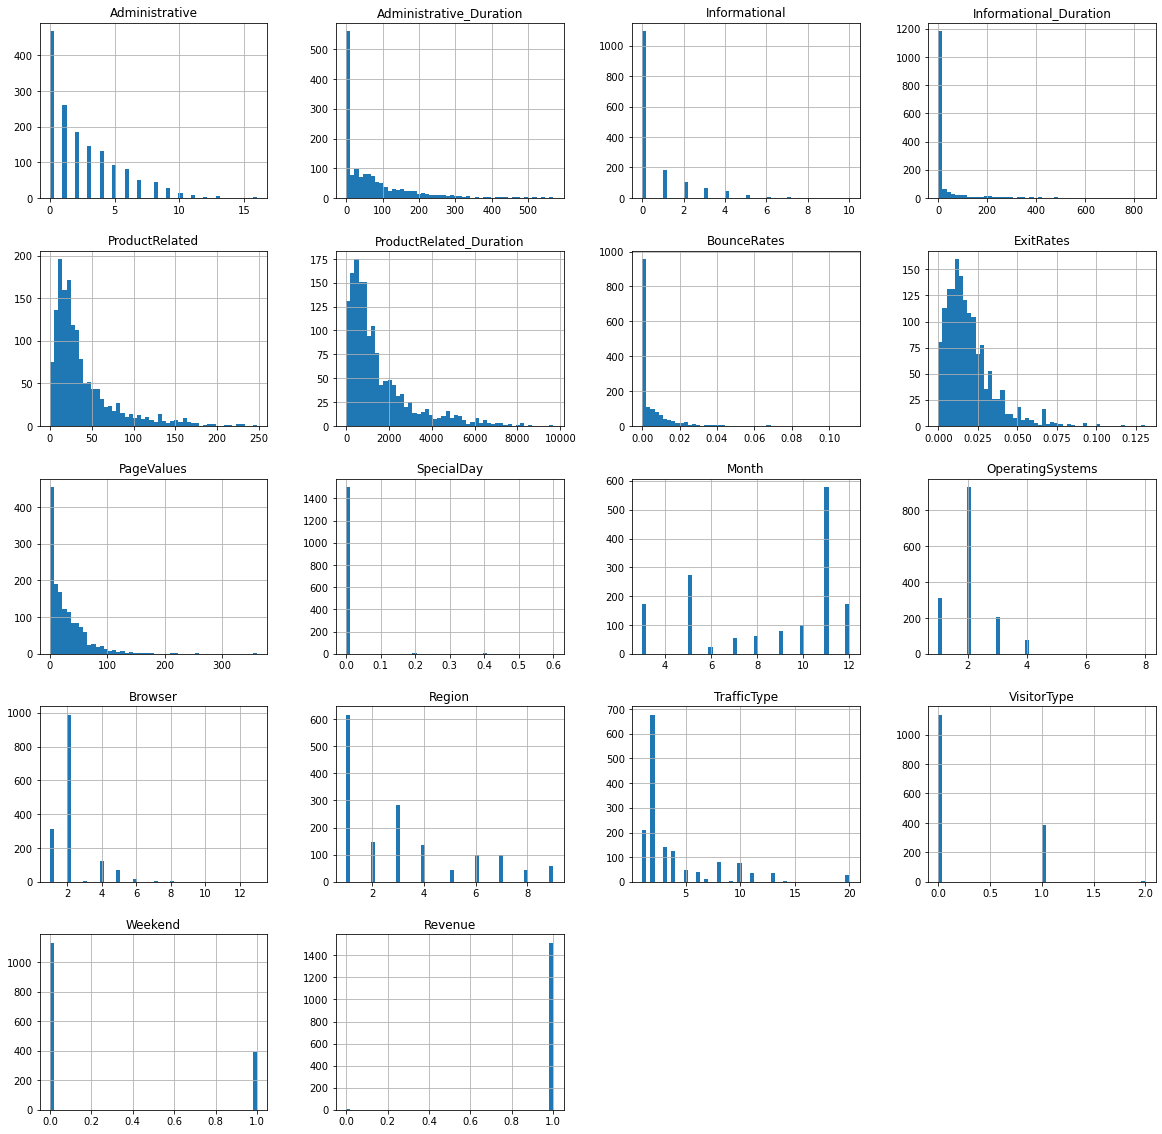

In [8]:
agglo(5)

# 5 Clusters observation

Cluster label 4 has highest revenue instances (1514 revenue / 8 non revenue). 
 This culster contains 79.35% (1514/1908) revenue instances.
 
Cluster label 0 has highest no revenue instance (7507 non revenue / 73 revenue).
 This culster contains 72.03% (7507/10422) non revenues instaces.
 

#  7 Clusters

labels:  7
cluster shape (693, 18)
label:  5
Revenues: 
0.0    690
1.0      3
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
TrafficType                0.124312
Administrative             0.107327
Month                      0.064608
OperatingSystems           0.051434
Browser                    0.035325
BounceRates                0.019932
ExitRates                  0.019280
Administrative_Duration   -0.002507
ProductRelated            -0.003603
Informational             -0.005621
ProductRelated_Duration   -0.011214
SpecialDay                -0.011526
VisitorType               -0.014323
Weekend                   -0.037593
Region                    -0.040989
Informational_Duration          NaN
PageValues                      NaN
Name: Revenue, dtype: float64

 hist: 



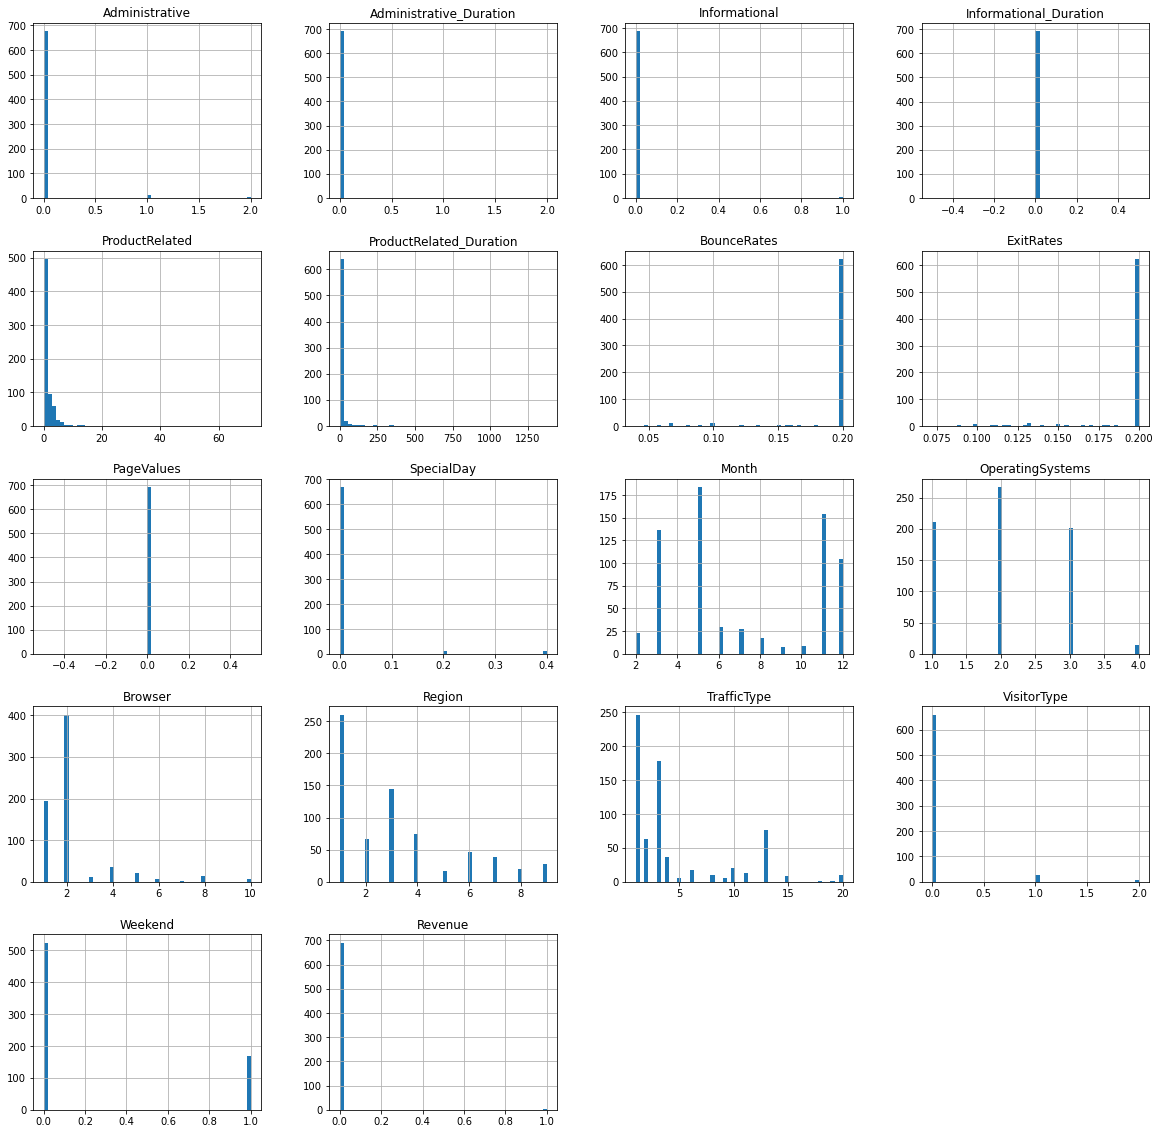

cluster shape (6358, 18)
label:  0
Revenues: 
0.0    6297
1.0      61
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
Browser                    0.335729
PageValues                 0.260926
VisitorType                0.248083
Informational_Duration     0.134427
Administrative             0.073220
ProductRelated             0.067652
Administrative_Duration    0.067621
ProductRelated_Duration    0.059340
Informational              0.057596
Month                      0.055854
TrafficType                0.049996
Weekend                    0.020002
OperatingSystems           0.007740
Region                     0.005660
SpecialDay                -0.004904
BounceRates               -0.028178
ExitRates                 -0.051539
Name: Revenue, dtype: float64

 hist: 



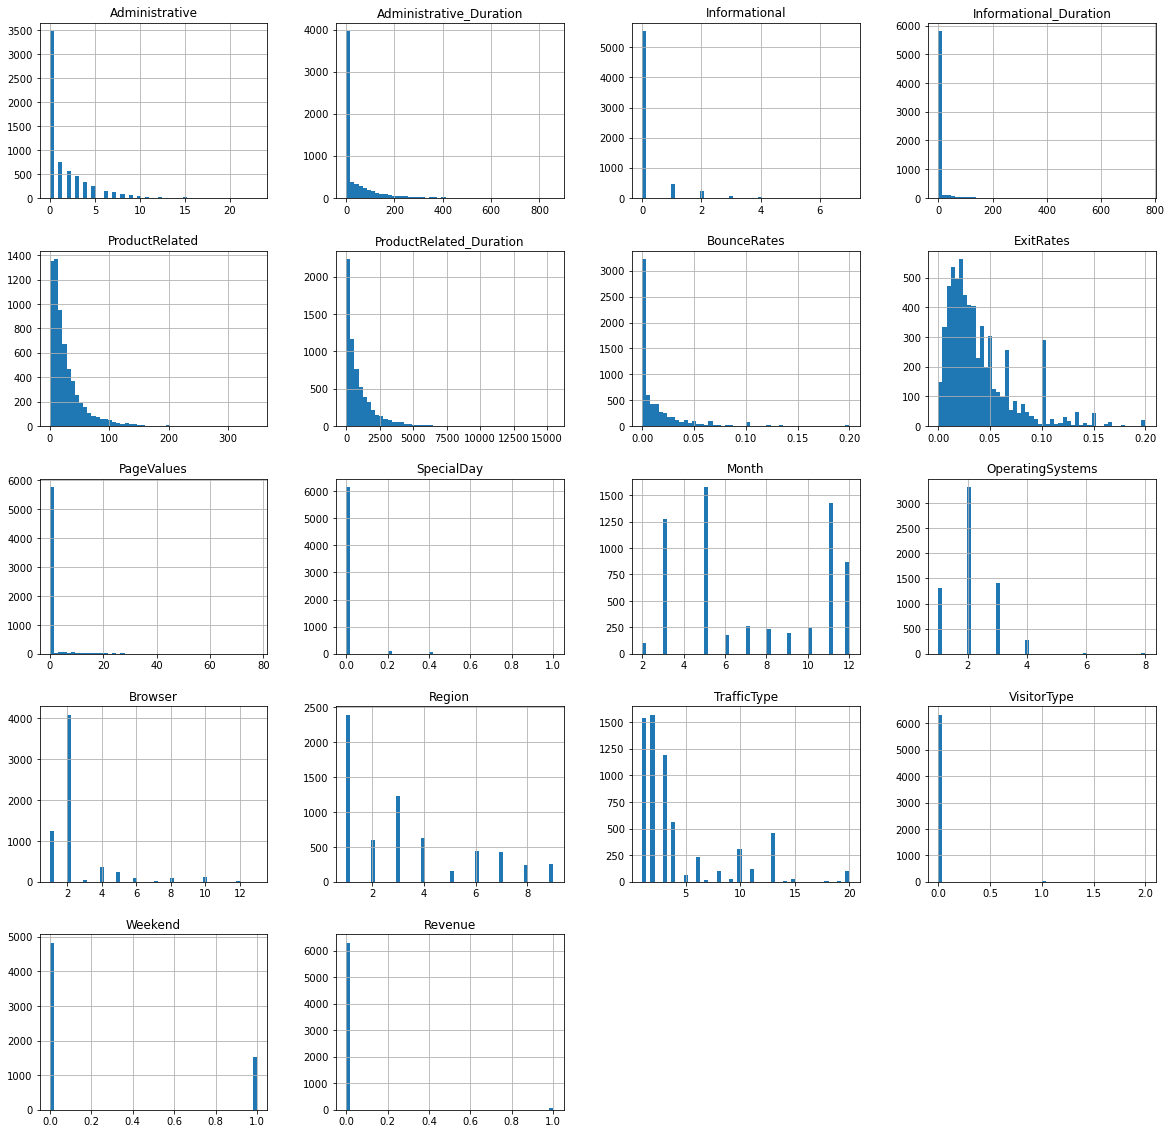

cluster shape (965, 18)
label:  3
Revenues: 
0.0    911
1.0     54
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.722640
VisitorType                0.159986
Informational              0.080166
Administrative             0.071409
Informational_Duration     0.059145
ProductRelated_Duration    0.046726
Administrative_Duration    0.045700
ProductRelated             0.044483
Region                     0.029390
Month                      0.020043
Weekend                    0.015560
OperatingSystems           0.006767
Browser                    0.001489
SpecialDay                -0.016379
TrafficType               -0.080744
BounceRates               -0.131842
ExitRates                 -0.185222
Name: Revenue, dtype: float64

 hist: 



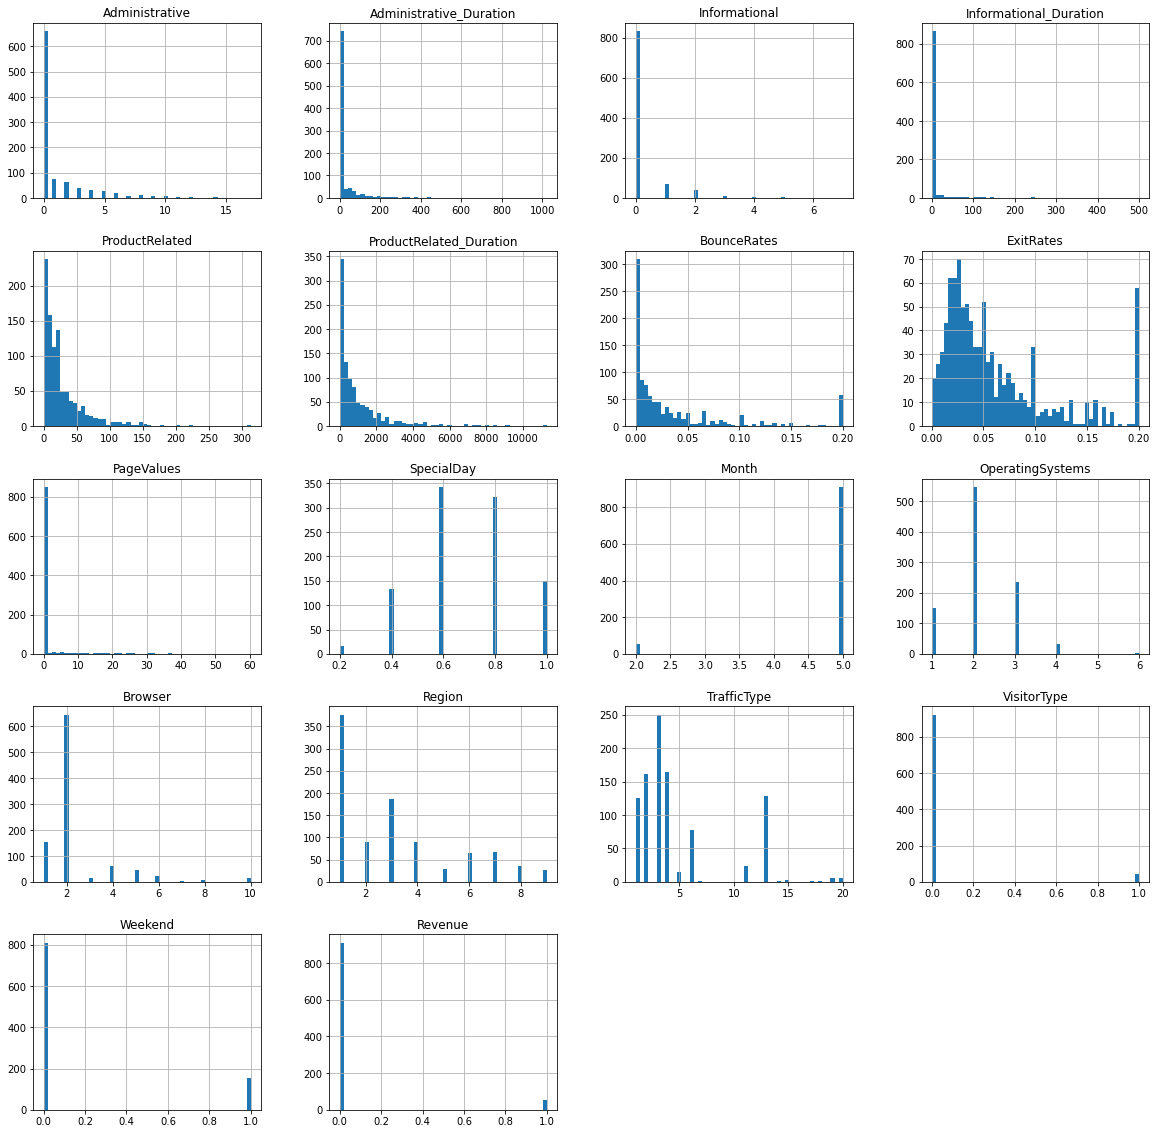

cluster shape (1160, 18)
label:  6
Revenues: 
0.0    990
1.0    170
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
Administrative             0.276712
Weekend                    0.210418
Administrative_Duration    0.201368
ProductRelated_Duration    0.177641
ProductRelated             0.162177
PageValues                 0.148822
TrafficType                0.123594
VisitorType                0.122331
Region                     0.058751
Month                      0.030170
OperatingSystems           0.024214
Browser                    0.021068
SpecialDay                -0.055488
BounceRates               -0.122830
Informational_Duration    -0.123826
ExitRates                 -0.134560
Informational             -0.143219
Name: Revenue, dtype: float64

 hist: 



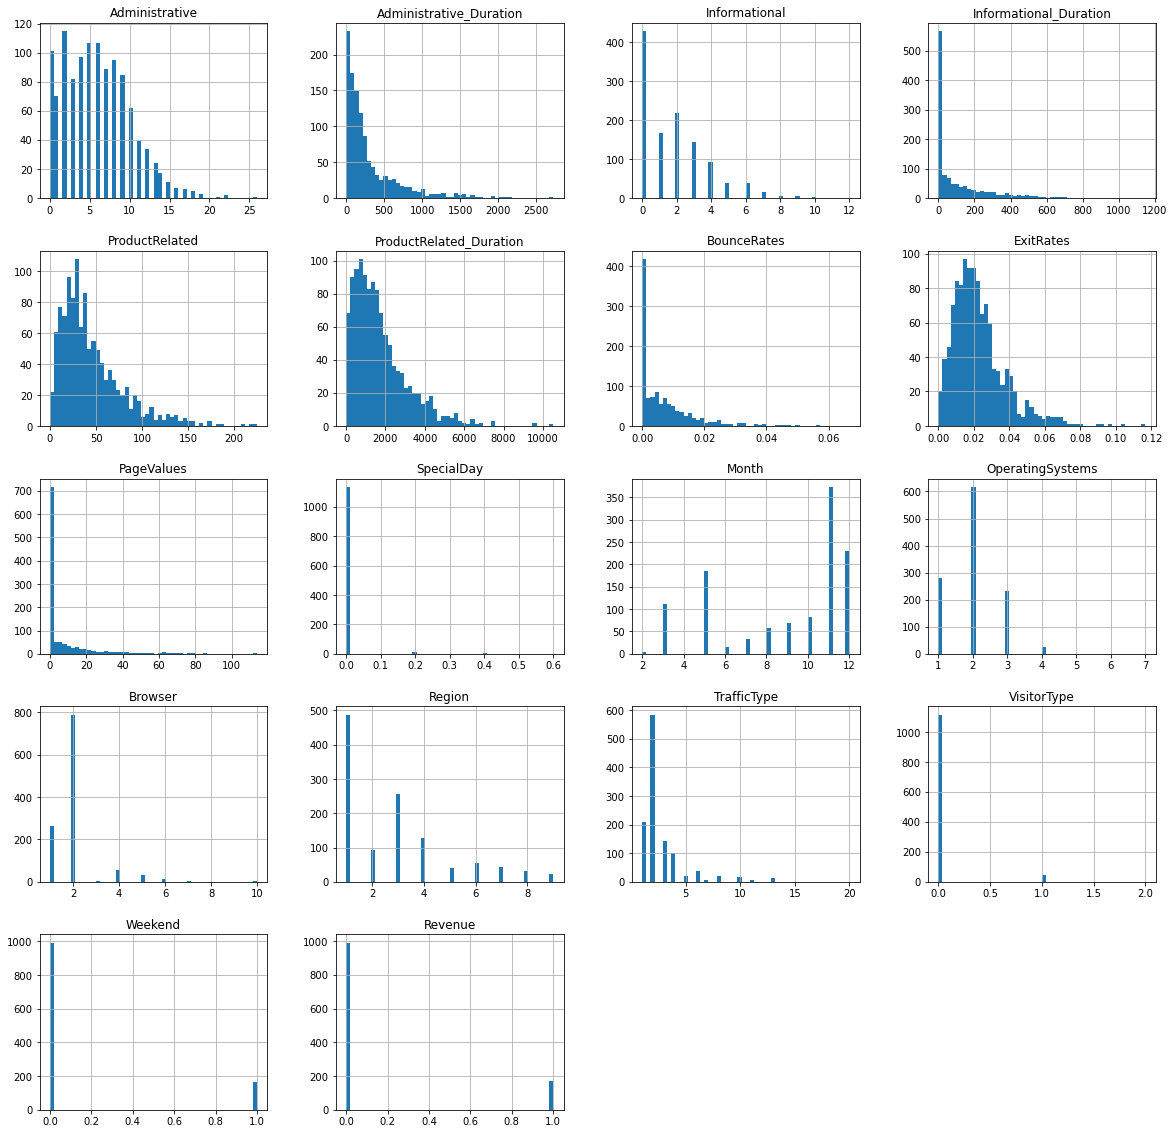

cluster shape (1222, 18)
label:  2
Revenues: 
0.0    1210
1.0      12
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
PageValues                 0.752953
VisitorType                0.407099
OperatingSystems           0.406863
Browser                    0.391614
TrafficType                0.372444
Region                     0.201117
Month                      0.098161
ProductRelated_Duration    0.091371
ProductRelated             0.024008
SpecialDay                -0.006054
Administrative_Duration   -0.006850
Administrative            -0.008492
Informational             -0.016048
BounceRates               -0.018711
Informational_Duration    -0.023927
ExitRates                 -0.026143
Weekend                   -0.044593
Name: Revenue, dtype: float64

 hist: 



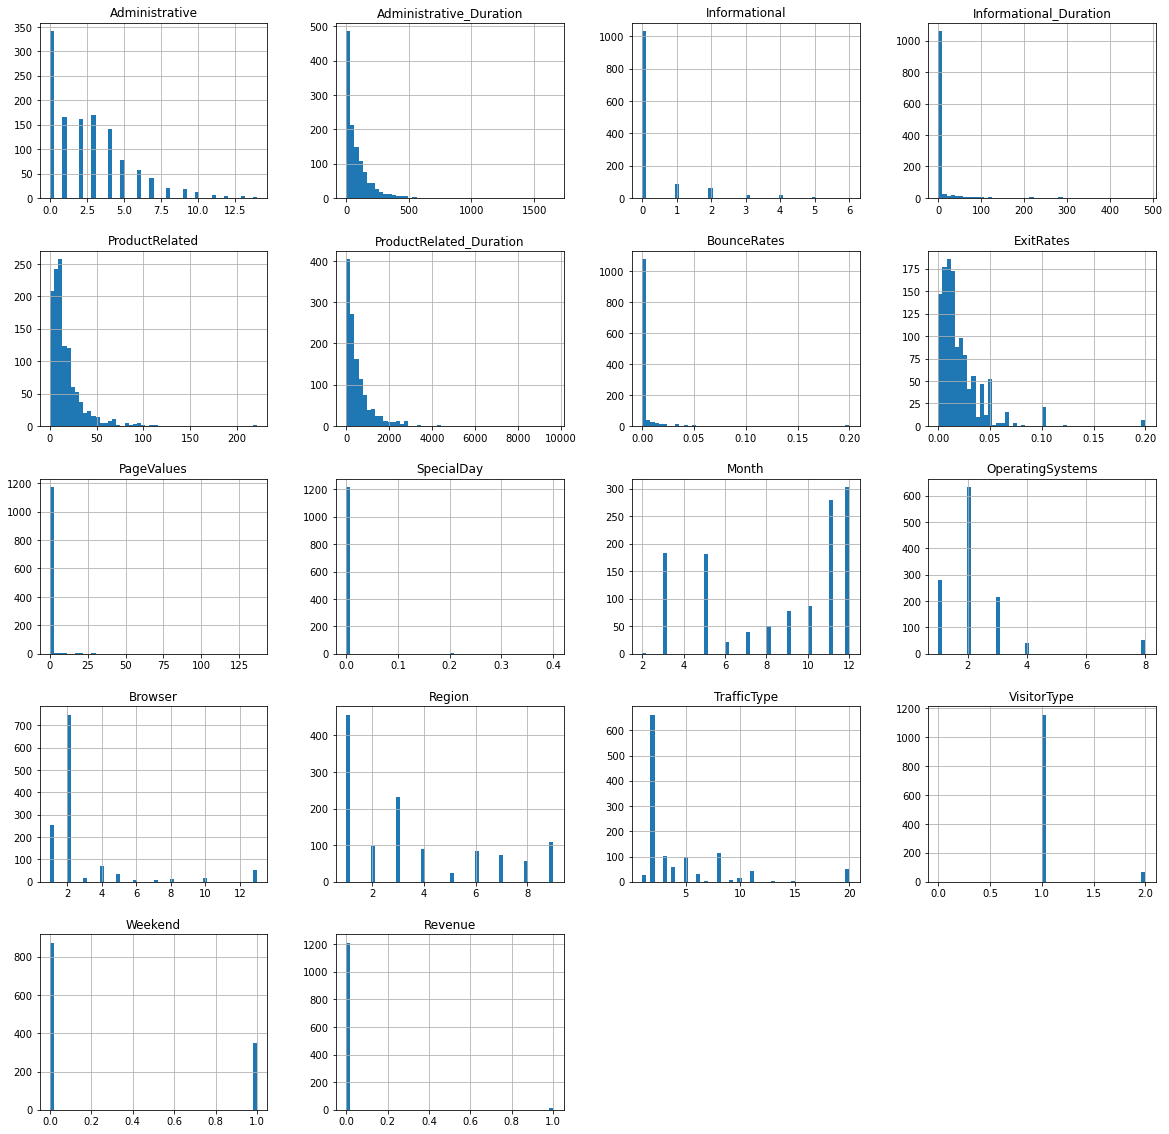

cluster shape (410, 18)
label:  1
Revenues: 
0.0    316
1.0     94
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
Month                      0.165973
ProductRelated             0.164327
ProductRelated_Duration    0.103882
PageValues                 0.084075
Administrative             0.049330
Informational              0.049088
OperatingSystems           0.044441
TrafficType                0.026709
Administrative_Duration    0.024091
Weekend                    0.018533
Informational_Duration     0.008250
SpecialDay                -0.008704
Browser                   -0.014283
VisitorType               -0.066467
Region                    -0.096917
BounceRates               -0.110688
ExitRates                 -0.142324
Name: Revenue, dtype: float64

 hist: 



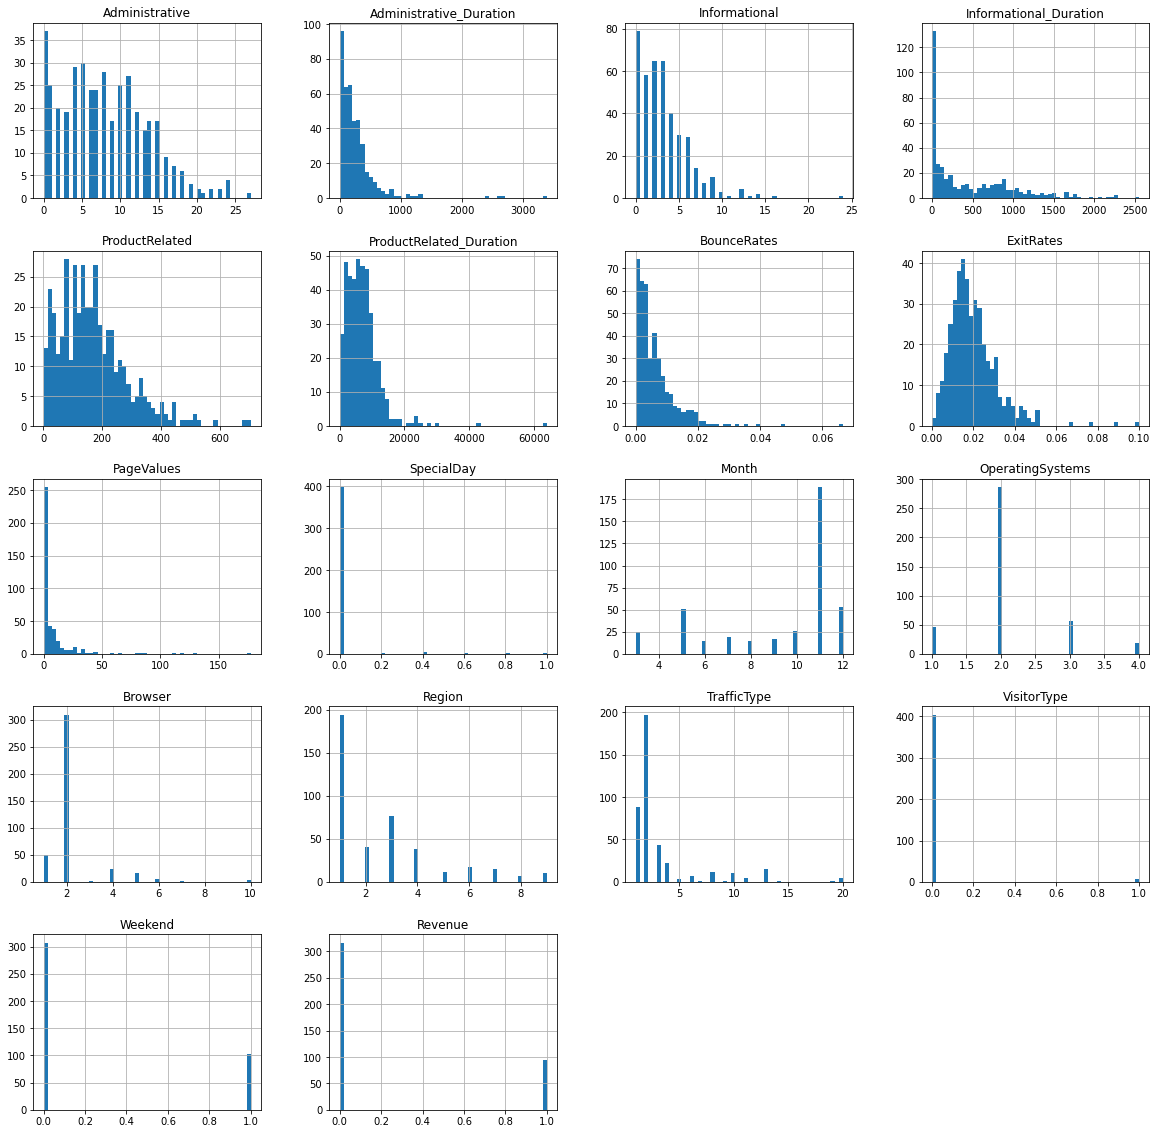

cluster shape (1522, 18)
label:  4
Revenues: 
1.0    1514
0.0       8
Name: Revenue, dtype: int64
Revenues correlation values: 
Revenue                    1.000000
Informational_Duration     0.020401
Informational              0.013959
SpecialDay                 0.007416
ExitRates                  0.006091
Region                     0.005830
VisitorType                0.001136
Weekend                    0.001039
Administrative            -0.008438
OperatingSystems          -0.020314
BounceRates               -0.022337
Month                     -0.026752
Administrative_Duration   -0.031326
Browser                   -0.041042
ProductRelated_Duration   -0.045740
ProductRelated            -0.061907
TrafficType               -0.073517
PageValues                -0.213204
Name: Revenue, dtype: float64

 hist: 



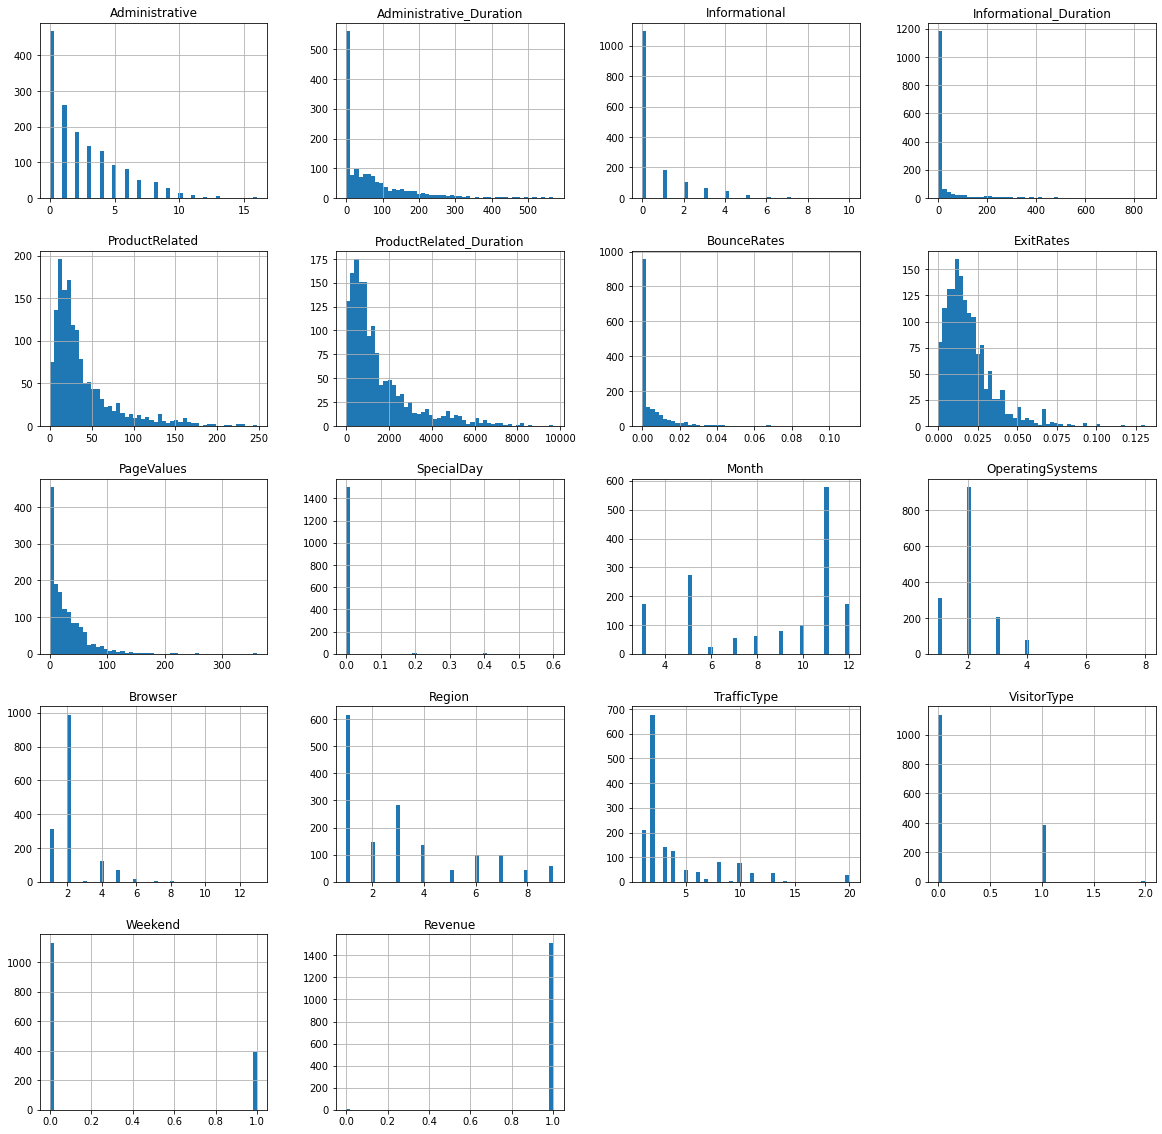

In [9]:
agglo(7)

# 7 Cluster Obseravtions:

Cluster label 4 has highest revenue instances (1514 revenue / 8 non revenue). 
 This culster contains 79.35% (1514/1908) revenue instances.
 
Cluster label 0 has highest no revenue instance (6297 non revenue / 61 revenue).
 This culster contains 60.42% (6297/10422) non revenues instaces.
 
    

# Extract min and max revenue clusters

In [10]:
def find_max_min_revenue_clusters(data):
    cluter_labels = data['labels'].unique()
    max_w_revenue_cnt = 0
    max_w_revenue_culster = None
    max_w_revenue_label = 0
    max_non_revenue_cnt = 0
    max_non_revenue_culster = None
    max_non_revenue_label = 0
    non_revenue_value = 0
    w_revenue_value = 0
    for label in cluter_labels:
        print("label: ", label)
        cluster = data[data['labels'] == label]
        #Drop Label
        #print("cluster shape", cluster.shape)
        cluster=cluster.drop(columns=['labels'])
        #print("cluster shape", cluster.shape)
        
        columns = cluster.columns
        #Reverse transform
        cluster = std_scaler.inverse_transform(cluster)
        cluster_df = pandas.DataFrame(data=cluster, columns=columns)
        print(cluster_df['Revenue'].value_counts())
        #revenue = cluster_df['Revenue'].value_counts()
        #revenue.sort_values(inplace=True)
        #print("revenue: ", revenue)
        non_revenue_value = 0
        w_revenue_value = 0
        for value in cluster_df['Revenue']:
            if value == 0:
                non_revenue_value=non_revenue_value + 1
            else:
                w_revenue_value = w_revenue_value + 1

        #print(non_revenue_value)
        #print(w_revenue_value)

        if (max_w_revenue_cnt < w_revenue_value):
            max_w_revenue_culster = cluster_df
            max_w_revenue_cnt = w_revenue_value
            max_w_revenue_label = label
            
        if (max_non_revenue_cnt < non_revenue_value):
            max_non_revenue_culster = cluster_df
            max_non_revenue_cnt = non_revenue_value
            max_non_revenue_label = label

    print("\n max non revenue label: "+str(max_non_revenue_label) + " Non revenue count: "+str(max_non_revenue_cnt))
    print("\n max revenue label: "+str(max_w_revenue_label) + " Revenue count: "+str(max_w_revenue_cnt))
    #print(max_revenue_culster)
    return max_w_revenue_culster, max_non_revenue_culster
   
def high_low_revenue_clusters(n_clusters):
    clustering = AgglomerativeClustering(n_clusters = n_clusters, affinity='euclidean', linkage='ward', compute_distances = True)
    dataset_scaled['labels'] = clustering.fit_predict(X)
    print("labels: ", clustering.n_clusters_)
    return find_max_min_revenue_clusters(dataset_scaled)

max_revenue_cluster, max_non_revenue_culster = high_low_revenue_clusters(7)


labels:  7
label:  5
0.0    690
1.0      3
Name: Revenue, dtype: int64
label:  0
0.0    6297
1.0      61
Name: Revenue, dtype: int64
label:  3
0.0    911
1.0     54
Name: Revenue, dtype: int64
label:  6
0.0    990
1.0    170
Name: Revenue, dtype: int64
label:  2
0.0    1210
1.0      12
Name: Revenue, dtype: int64
label:  1
0.0    316
1.0     94
Name: Revenue, dtype: int64
label:  4
1.0    1514
0.0       8
Name: Revenue, dtype: int64

 max non revenue label: 0 Non revenue count: 6297

 max revenue label: 4 Revenue count: 1514


# Data visulazation of highest revenue and lowest revenue clusters

Highest Revenue cluster: 
1.0    1514
0.0       8
Name: Revenue, dtype: int64
Lowest Revenue cluster: 
0.0    6297
1.0      61
Name: Revenue, dtype: int64
Highest Revenue cluster: 
       Administrative  Administrative_Duration  Informational  \
count     1522.000000              1522.000000    1522.000000   
mean         2.552562                71.797232       0.612352   
std          2.778746                95.226913       1.236442   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          2.000000                38.600000       0.000000   
75%          4.000000               101.354167       1.000000   
max         16.000000               569.000000      10.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             1522.000000    1.522000e+03              1522.000000   
mean                35.161919    3.866360e+01              1490.133167   
std        

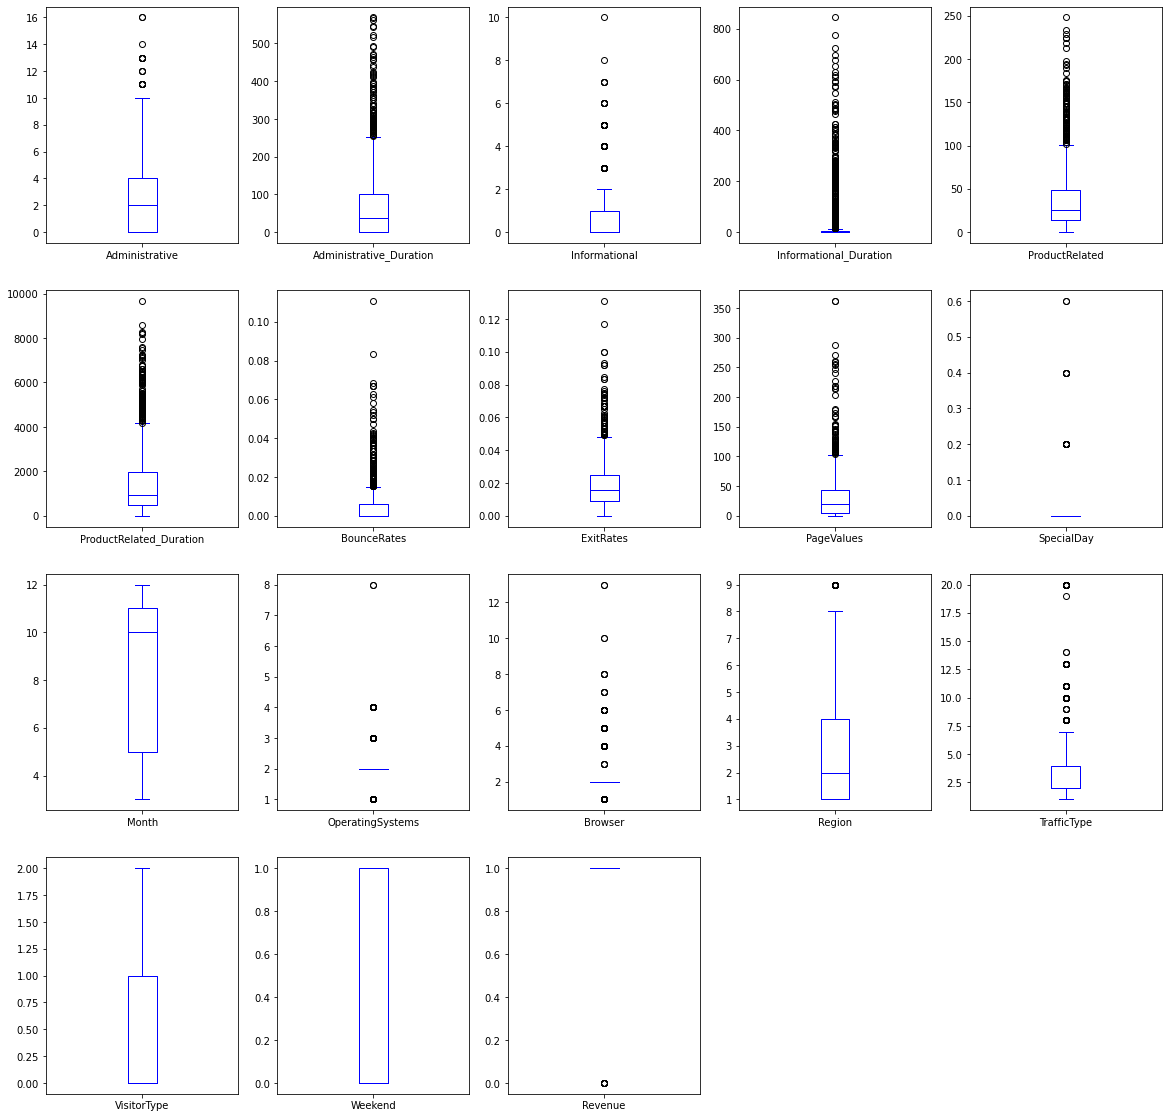


 Lowest Revenue cluster plot: 



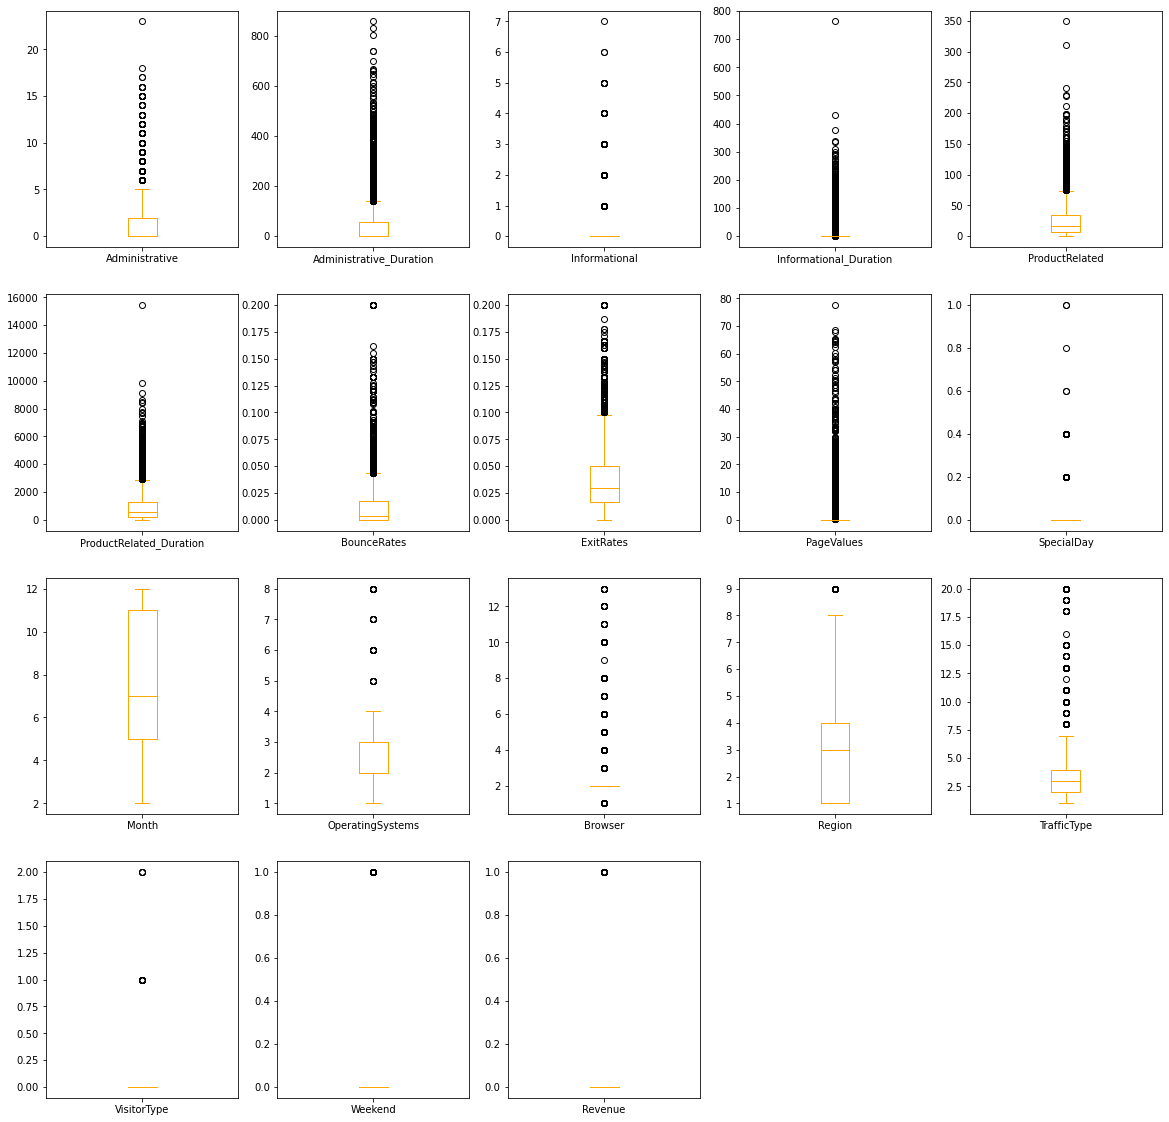


 Highest Revenue cluster hist: 



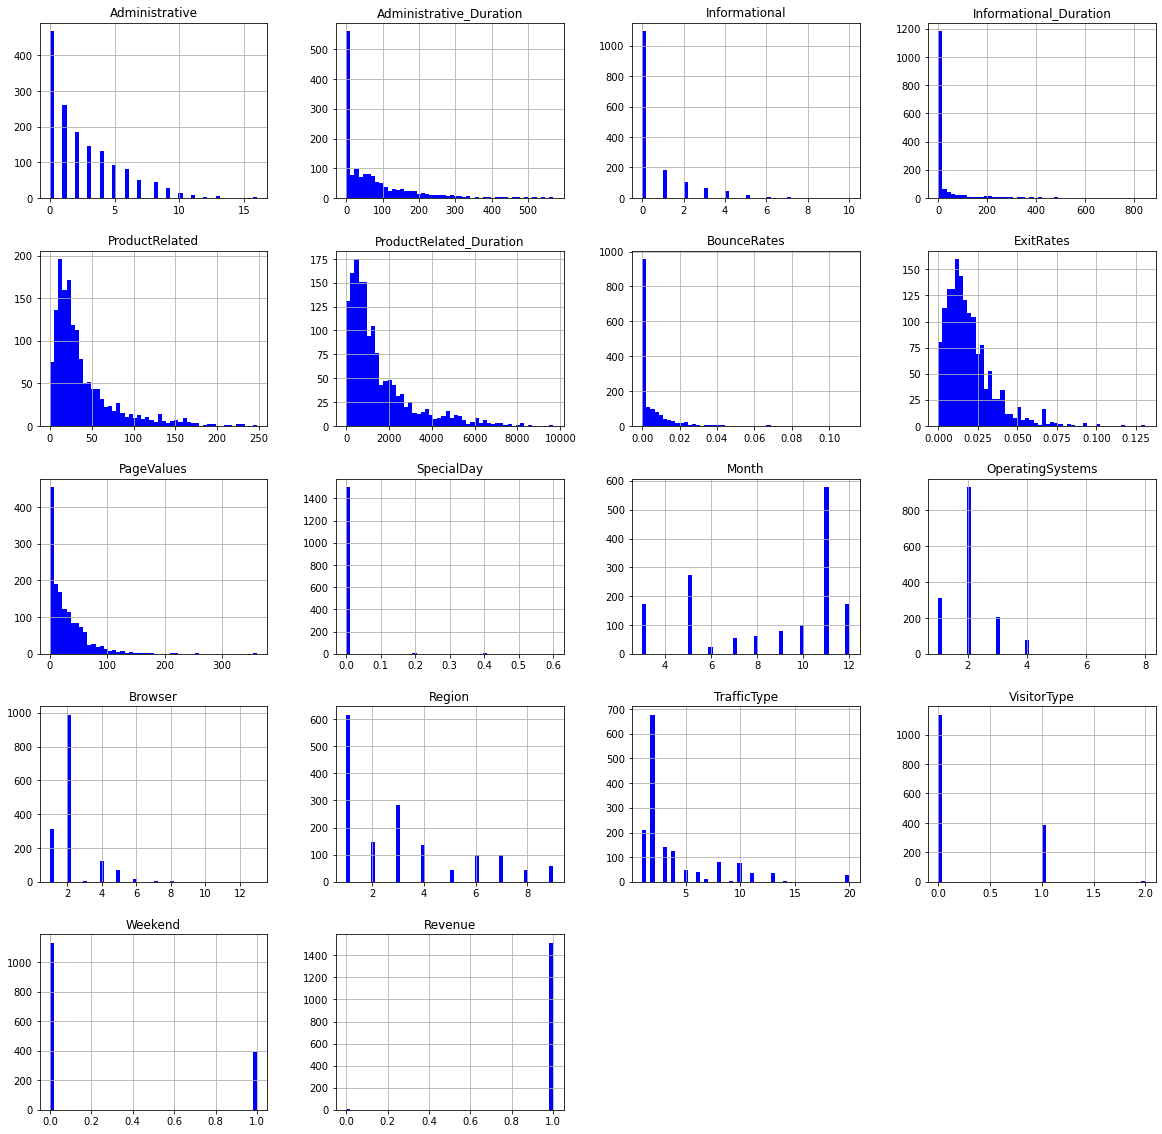


 Lowest Revenue cluster hist: 



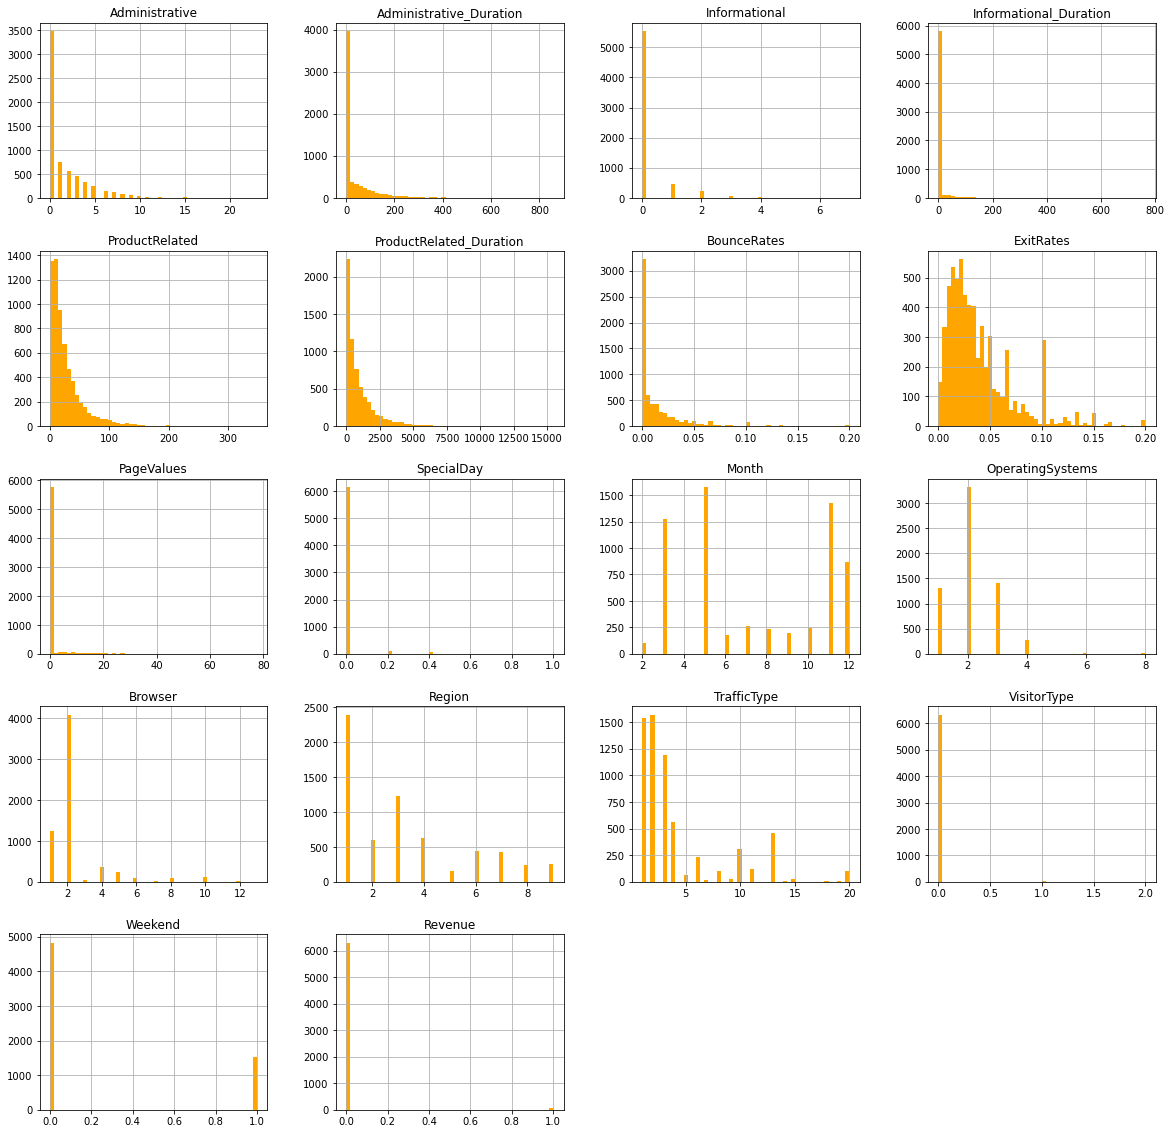

Highest Revenue cluster values: 
Revenue                    1.000000
Informational_Duration     0.020401
Informational              0.013959
SpecialDay                 0.007416
ExitRates                  0.006091
Region                     0.005830
VisitorType                0.001136
Weekend                    0.001039
Administrative            -0.008438
OperatingSystems          -0.020314
BounceRates               -0.022337
Month                     -0.026752
Administrative_Duration   -0.031326
Browser                   -0.041042
ProductRelated_Duration   -0.045740
ProductRelated            -0.061907
TrafficType               -0.073517
PageValues                -0.213204
Name: Revenue, dtype: float64
Lowest Revenue cluster values: 
Revenue                    1.000000
Browser                    0.335729
PageValues                 0.260926
VisitorType                0.248083
Informational_Duration     0.134427
Administrative             0.073220
ProductRelated             0.067652
Admin

In [11]:
def data_visualization(data_df):
    print(data_df['Revenue'].value_counts())
    # For a statistical summary: describe
    # This provides information such as mean, count, avg, max, min etc.
    print(str(data_df.describe()))

    # To visualise univariate(plots of individual variables) plots: box and whisker plots
    # For better idea of variable distribution
    print("\n plot: \n")
    data_df.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
    plt.show()

    # To visualise as a histogram: hist
    print("\n hist: \n")
    data_df.hist(bins=50, figsize=(20,20))
    plt.show()

    #Correlation matrix
    corrMatrix = data_df.corr()
    mask = numpy.zeros_like(corrMatrix)
    mask[numpy.triu_indices_from(mask)] = True
    #print (corrMatrix)
    plt.figure(figsize=(15, 15))
    sn.heatmap(corrMatrix, annot=True, mask=mask)
    plt.show()

def data_visualization_high_low(high_revenue, low_revenue):
    print("Highest Revenue cluster: ")
    print(high_revenue['Revenue'].value_counts())
    print("Lowest Revenue cluster: ")
    print(low_revenue['Revenue'].value_counts())
    # For a statistical summary: describe
    # This provides information such as mean, count, avg, max, min etc.

    #columns = high_revenue.columns
    #for col in columns:
    #        print("Highest Revenue cluster: \n"+ str(high_revenue[col].describe()) + 
    #              "\nLowest Revenue cluster: \n"+ str(low_revenue[col].describe()))
    print("Highest Revenue cluster: ")
    print(str(high_revenue.describe()))
    print("Lowest Revenue cluster: ")
    print(str(low_revenue.describe()))
    
    # To visualise univariate(plots of individual variables) plots: box and whisker plots
    # For better idea of variable distribution
    print("\n Highest Revenue cluster plot: \n")
    high_revenue.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False, color = 'blue')
    plt.show()

    print("\n Lowest Revenue cluster plot: \n")
    low_revenue.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False, color = 'orange')
    plt.show()
    
    # To visualise as a histogram: hist
    print("\n Highest Revenue cluster hist: \n")
    high_revenue.hist(bins=50, figsize=(20,20),color = 'blue')
    plt.show()

    print("\n Lowest Revenue cluster hist: \n")
    low_revenue.hist(bins=50, figsize=(20,20),color = 'orange')
    plt.show()

    #Correlation matrix
    high_revenue_corrMatrix = high_revenue.corr()
    low_revenue_corrMatrix = low_revenue.corr()
    print("Highest Revenue cluster values: \n"+str(high_revenue_corrMatrix["Revenue"].sort_values(ascending=False)))
    print("Lowest Revenue cluster values: \n"+str(low_revenue_corrMatrix["Revenue"].sort_values(ascending=False)))
    
#print("Highest Revenue cluster: ")
#data_visualization(max_revenue_cluster)
#print("Lowest Revenue cluster: ")
#data_visualization(min_revenue_culster)

data_visualization_high_low(max_revenue_cluster, max_non_revenue_culster)

# Cluster analysis Revenue conclusions

Cluster label 4 has highest revenue instances (1514 revenue / 8 non revenue). 
 This culster contains 79.35% (1514/1908) revenue instances.


Administrative and Administrative_Duration: 
Meaningfull values have HIGH revenue instances. 
Too high or too low value have LOW revenue instances. 

Information page and Information_Duration:
Most of zero Information have LOW revenue instances.
Small amount Information_Duration have HIGH revenue instances

ProductRelated and ProductRelated_Duration: 
Meaningfull values have HIGH revenue instances. 
Too high or too low values have LOW revenue instances. 

BounceRates:
Lower BounceRate have HIGH renveue instances and vice virsa

ExitRates:
Not too high ExitRates have HIGH renveue instances

PageValues: Meaningfull(most non-zero and not too high) value of PageValues have HIGH renveue instances

SpecialDay: Does not have much impact, but some revenue instance with special day

 Month: HIGH revenue intances are in a month of November

OperatingSystems: HIGH revenue instances are with Operating system 2.

Browser: HIGH revenue instances are with Browser 2.


TrafficType: HIGH revenue instances are with trafifc type 2.


VisitorType: HIGH revenue instances are with Returning_Visitor.

Weekend: HIGH revenue instances are with non-weekend.

# IGNORE: Roughs

# 2 Clusters

labels:  2
label:  0
0.0    9108
1.0     130
Name: Revenue, dtype: int64
label:  1
1.0    1778
0.0    1314
Name: Revenue, dtype: int64

 max non revenue label: 0 Non revenue count: 9108

 max revenue label: 1 Revenue count: 1778
Highest Revenue cluster: 
1.0    1778
0.0    1314
Name: Revenue, dtype: int64
Lowest Revenue cluster: 
0.0    9108
1.0     130
Name: Revenue, dtype: int64
Highest Revenue cluster: 
       Administrative  Administrative_Duration  Informational  \
count     3092.000000              3092.000000    3092.000000   
mean         4.531048               186.048097       1.386805   
std          4.309073               292.002605       2.033637   
min          0.000000                 0.000000       0.000000   
25%          1.000000                16.000000       0.000000   
50%          4.000000                89.500000       0.000000   
75%          7.000000               223.000000       2.000000   
max         27.000000              3398.750000      24.000000   

    

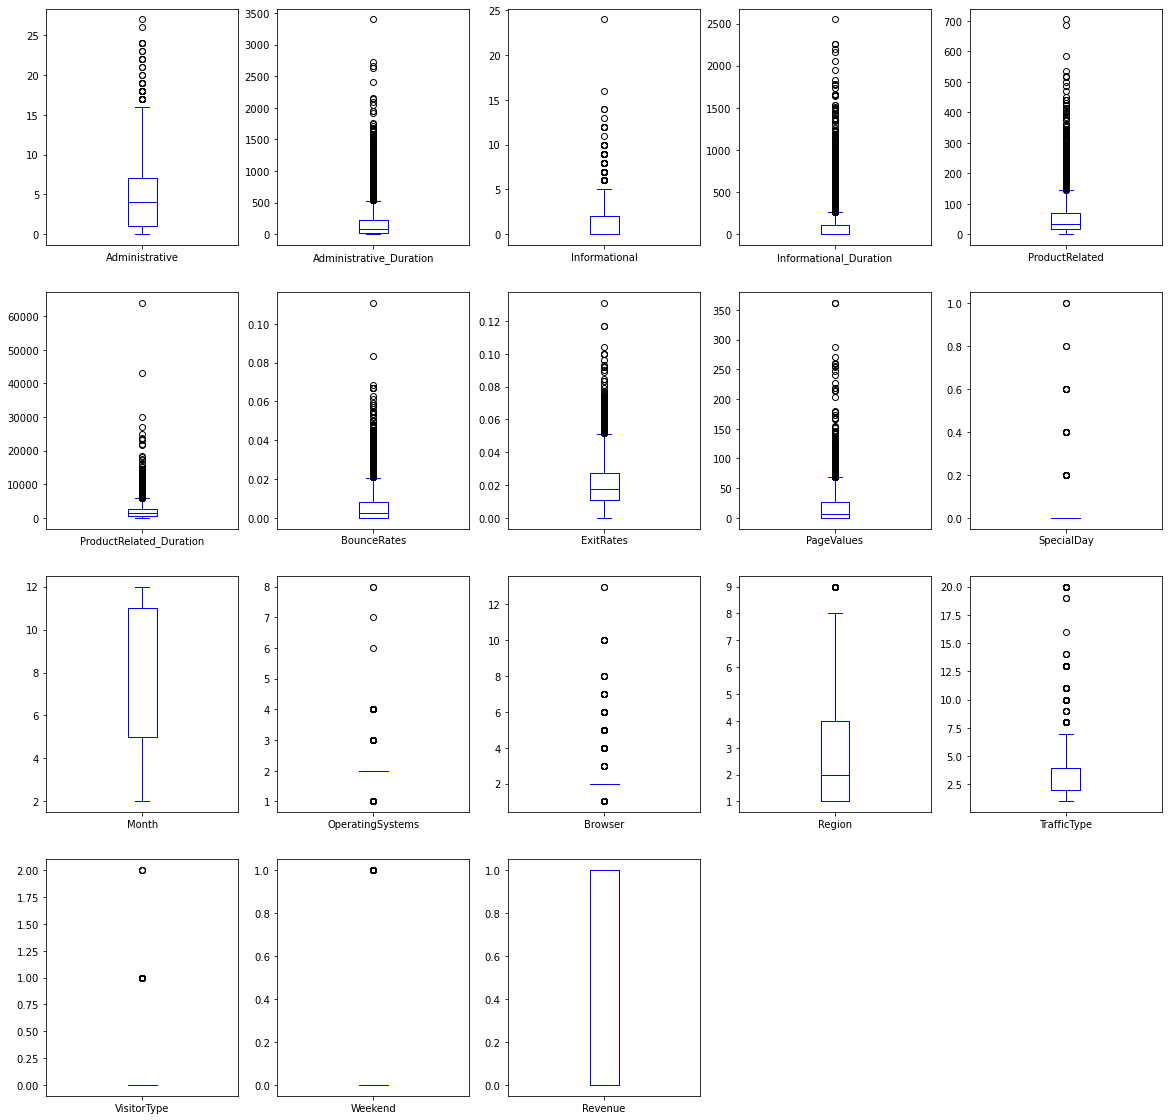


 Lowest Revenue cluster plot: 



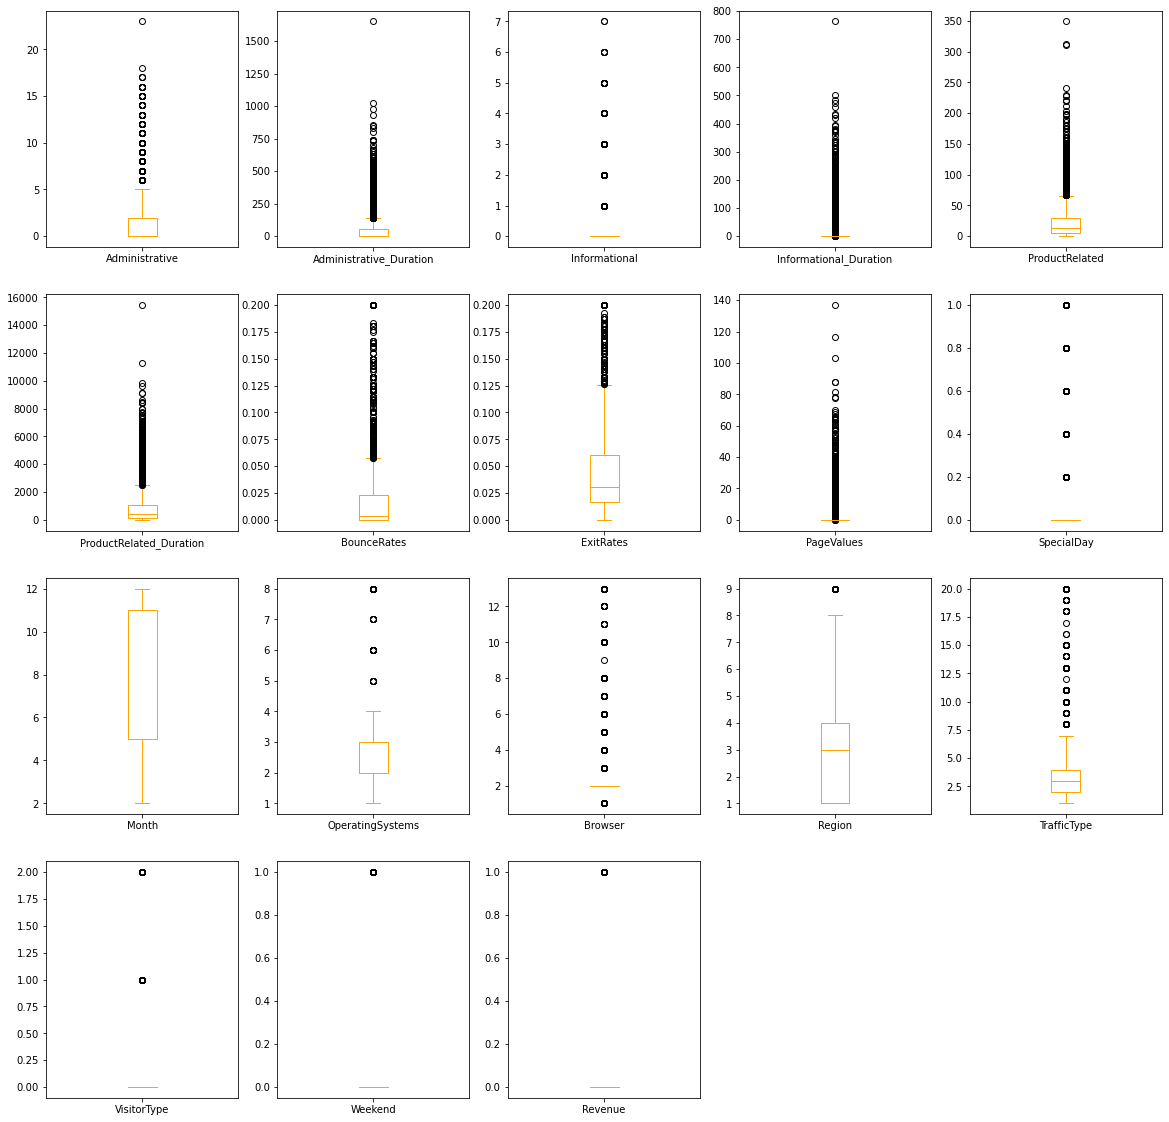


 Highest Revenue cluster hist: 



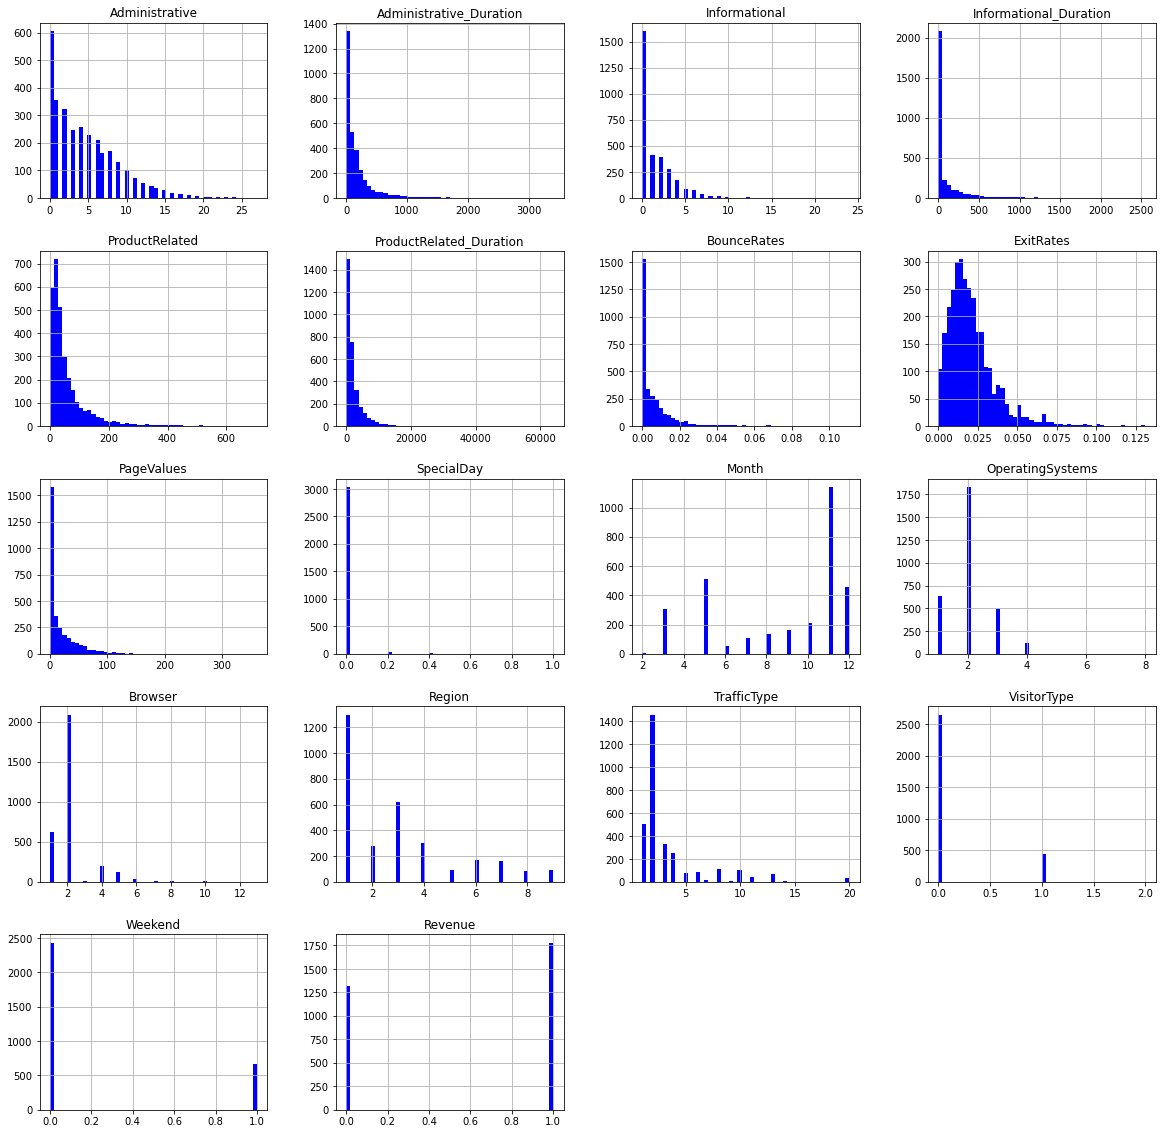


 Lowest Revenue cluster hist: 



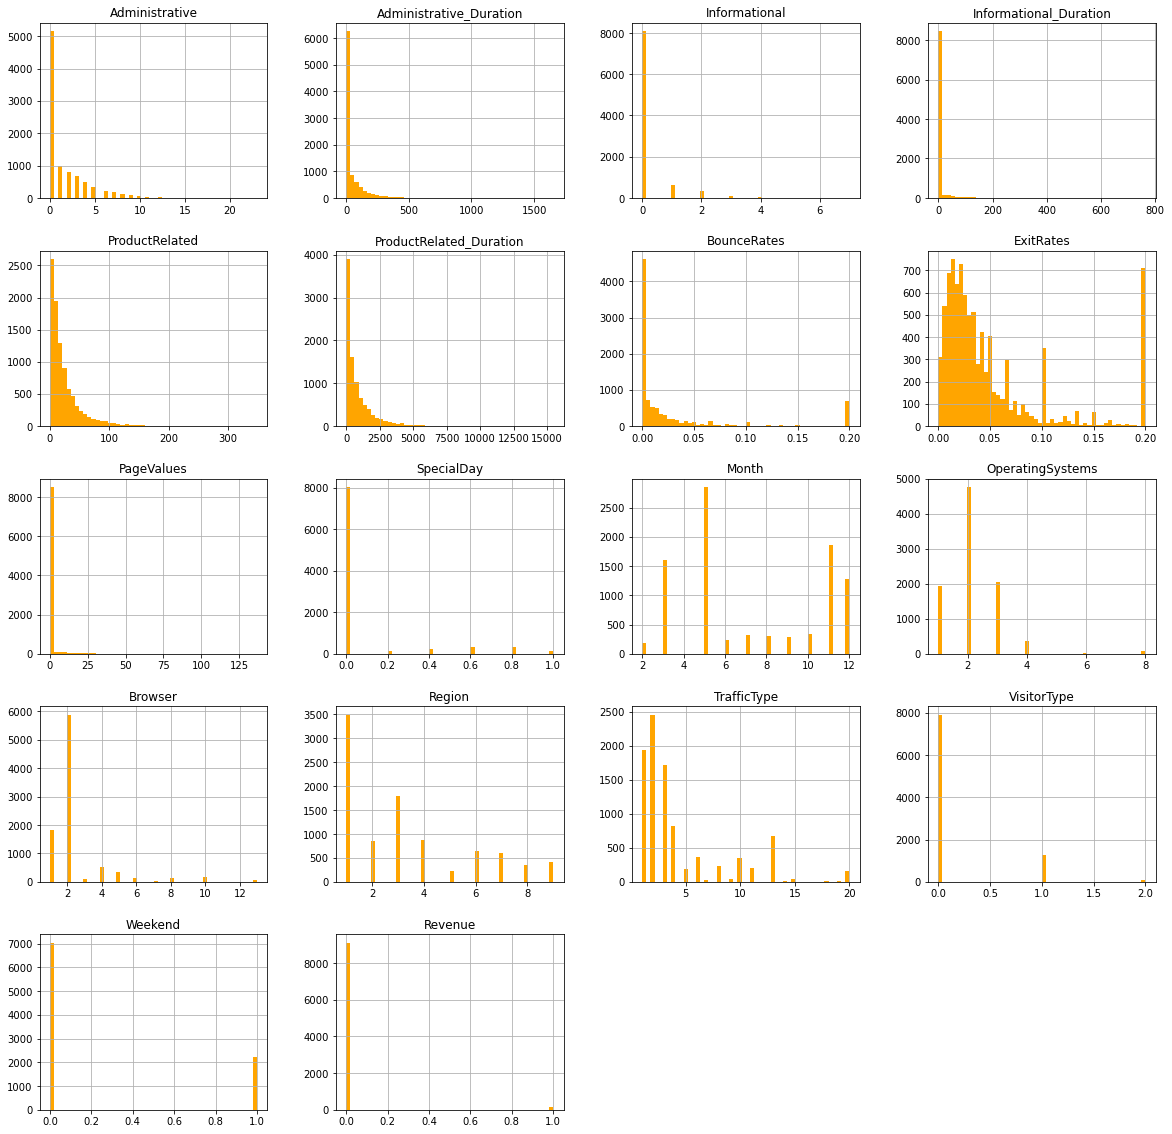

Highest Revenue cluster values: 
Revenue                    1.000000
PageValues                 0.298760
VisitorType                0.278212
TrafficType                0.157417
Weekend                    0.140278
Region                     0.060749
Browser                    0.041454
OperatingSystems           0.009125
Month                     -0.031726
SpecialDay                -0.052393
ExitRates                 -0.127845
BounceRates               -0.149849
ProductRelated_Duration   -0.149908
ProductRelated            -0.151364
Informational_Duration    -0.247072
Administrative_Duration   -0.253203
Administrative            -0.292348
Informational             -0.331008
Name: Revenue, dtype: float64
Lowest Revenue cluster values: 
Revenue                    1.000000
PageValues                 0.414637
Browser                    0.242573
SpecialDay                 0.109735
Informational_Duration     0.084301
OperatingSystems           0.074022
VisitorType                0.067014
Traff

In [12]:
max_revenue_cluster, max_non_revenue_culster = high_low_revenue_clusters(2)
data_visualization_high_low(max_revenue_cluster, max_non_revenue_culster)


# K-means++ clustering

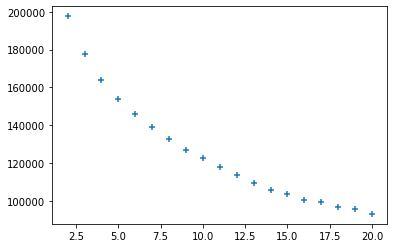

In [13]:
#WSS= within-Cluster-Sum of squared
wss_list = []
k_list = []
for k in range(2,21,1):
    KMean_model = KMeans(n_clusters=k, init='k-means++', random_state=0)
    dataset_scaled['labels'] = KMean_model.fit_predict(X)
    #print("labels: ", KMean_model.labels_)
    #print("n_clusters_: ",KMean_model.cluster_centers_)
    #print("inertia_: ", KMean_model.inertia_)
    wss_list.append(KMean_model.inertia_)
    k_list.append(k)
    #print("n_iter_: ",KMean_model.n_iter_)
    #print("n_features_in_: ", KMean_model.n_features_in_)
    #data_cluster_data_visualization(dataset_scaled)
    #y_pred = KMean_model.predict()
plt.scatter(x=k_list, y=wss_list, marker="+")
plt.show()

In [14]:
for k in range(2,21,1):
    labels = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(X).labels_
    print("Silhouette score for k(clusers) ="+str(k) +" is "
        +str(sklearn.metrics.silhouette_score(X, labels, metric='euclidean',random_state=0)))

Silhouette score for k(clusers) =2 is 0.2516403341437136
Silhouette score for k(clusers) =3 is 0.2347585109659164
Silhouette score for k(clusers) =4 is 0.2039934277864987
Silhouette score for k(clusers) =5 is 0.19798117096749673
Silhouette score for k(clusers) =6 is 0.14739089547845938
Silhouette score for k(clusers) =7 is 0.18083955954460154
Silhouette score for k(clusers) =8 is 0.12337486407548952
Silhouette score for k(clusers) =9 is 0.15526147001544366
Silhouette score for k(clusers) =10 is 0.12542457980109736
Silhouette score for k(clusers) =11 is 0.13453864111602257
Silhouette score for k(clusers) =12 is 0.1391029038239012
Silhouette score for k(clusers) =13 is 0.13582582609542002
Silhouette score for k(clusers) =14 is 0.1424627286921007
Silhouette score for k(clusers) =15 is 0.13610792054003493
Silhouette score for k(clusers) =16 is 0.13802988168095892
Silhouette score for k(clusers) =17 is 0.1380677544452206
Silhouette score for k(clusers) =18 is 0.14067283917490797
Silhouette 

# Feature reduction


In [15]:
#from sklearn import datasets, cluster
#from sklearn.cluster import AgglomerativeClustering
f_clustering = cluster.FeatureAgglomeration(n_clusters = 2, affinity='euclidean', linkage='ward', compute_distances = True)
print(X.shape)
X_all_features = dataset_encoded.values[:,0:17]
y = dataset_encoded.values[:,17]
print(X_all_features.shape)
print(X.shape)
print(y.shape)
f_clustering.fit(X_all_features)
X_scaled_reduced = f_clustering.transform(X_all_features)
print(X_scaled_reduced.shape)

NameError: name 'cluster' is not defined

In [ ]:
f_clustering = cluster.FeatureAgglomeration(n_clusters = 2, affinity='euclidean', linkage='ward', compute_distances = True)
print(X.shape)
X_all_features = dataset_encoded.values[:,0:17]
y = dataset_encoded.values[:,17]
print(X_all_features.shape)
print(X.shape)
print(y.shape)
f_clustering.fit(X_all_features)
X_reduced = f_clustering.transform(X_all_features)
print(X_reduced.shape)

print(X)
print(X_scaled_reduced)
def color_map(y_label):
    if y_label == 0:
        return "DarkRed"
    else:
        return "DarkGreen"


color = [color_map(i) for i in y]
#print(color)

plt.scatter(x=X_reduced[:,0], y=X_reduced[:,1],c=color)
plt.show()

In [ ]:
x_std_scaler = StandardScaler().fit(X_all_features)
X_all_features_scaled = x_std_scaler.transform(X_all_features)
print(X_all_features_scaled)
print(X_all_features_scaled.shape)

f_clustering.fit(X_all_features_scaled)
X_scaled_reduced = f_clustering.transform(X_all_features_scaled)
print(X_scaled_reduced.shape)

print(X)
print(X_scaled_reduced)
def color_map(y_label):
    if y_label == 0:
        return "DarkRed"
    else:
        return "DarkGreen"


color = [color_map(i) for i in y]
#print(color)

plt.scatter(x=X_scaled_reduced[:,0], y=X_scaled_reduced[:,1],c=color)
plt.show()